#Chennai House Price Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read csv and create dataframe
df = pd.read_csv('/content/drive/MyDrive/Guvi Project/train-chennai-sale.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [ ]:
# change to date time data type
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])

### Data Cleaning

In [ ]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [ ]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [ ]:
# To check for duplicate entry
df[df.duplicated(keep='last', subset = None)]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


In [ ]:
# To remove irrelavant feature
df.drop(['PRT_ID'], axis = 1, inplace = True)

In [ ]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
# replace spell mistake with correct word
df['AREA'] = df['AREA'].replace({
    'TNagar': 'T Nagar',
    'Chrmpet': 'Chrompet',
    'Chrompt' : 'Chrompet',
    'Chormpet' : 'Chrompet',
    'Adyr' : 'Adyar',
    'Velchery' : 'Velachery',
    'Ann Nagar' : 'Anna Nagar',
    'Ana Nagar': 'Anna Nagar',
    'KKNagar' : 'KK Nagar',
    'Karapakkam' : 'Karapakam'
})

In [ ]:
df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [ ]:
df['N_BATHROOM'].value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [ ]:
df['N_ROOM'].value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

In [ ]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
# replace spell mistake with correct words
df['SALE_COND'] = df['SALE_COND'].replace({
    'Ab Normal' : 'AbNormal',
    'Partiall' : 'Partial',
    'PartiaLl' : 'Partial',
    'AdjLand' : 'Adj Land'
})

In [ ]:
df['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
# replace spell mistake with correct word
df['PARK_FACIL'] = df['PARK_FACIL'].replace({
    'Noo' : 'No'
})

In [ ]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
# replace spell mistakes with correct word
df['BUILDTYPE'] = df['BUILDTYPE'].replace({
    'Comercial' : 'Commercial',
    'Other' : 'Others'
})

In [ ]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
# replace spell mistake with correct word
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace({
    'AllPub' : 'All Pub',
    'NoSeWa' : 'NoSewer',
    'NoSewr ' : 'NoSewer'
})

In [ ]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
# replace spell mistake with correct word
df['STREET'] = df['STREET'].replace({
    'Pavd' : 'Paved',
    'NoAccess' : 'No Access'
})

In [ ]:
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [ ]:
df['QS_ROOMS'].unique()

array([4. , 4.9, 4.1, 4.7, 3. , 4.5, 3.6, 2.4, 2.9, 3.1, 2.2, 2.1, 4.8,
       3.8, 2.3, 3.5, 4.6, 2.8, 4.2, 3.4, 2.7, 2. , 4.3, 3.9, 2.6, 3.3,
       2.5, 3.7, 3.2, 4.4, 5. ])

In [ ]:
df['QS_BATHROOM'].unique()

array([3.9, 4.2, 3.8, 2.5, 2.6, 2.1, 4.5, 3.7, 3.1, 3.2, 3.4, 2.2, 4.6,
       4.9, 2.7, 4.4, 5. , 2.8, 3. , 2.9, 3.6, 4. , 4.3, 2. , 3.3, 4.7,
       2.3, 4.1, 4.8, 3.5, 2.4])

In [ ]:
df['QS_BEDROOM'].unique()

array([4.9, 2.5, 2.2, 3.6, 4.1, 3.1, 2.1, 4. , 3.3, 4.5, 3.7, 4.8, 4.7,
       2.9, 3.4, 2.8, 3.8, 3. , 3.2, 2. , 4.3, 3.9, 3.5, 2.6, 4.4, 2.4,
       4.6, 5. , 2.3, 2.7, 4.2])

In [ ]:
df['QS_OVERALL'].unique()

array([4.33 , 3.765, 3.09 , 4.01 , 3.29 , 3.32 , 2.67 , 3.26 , 3.55 ,
       3.16 , 3.83 , 2.89 , 2.26 , 3.19 , 3.66 ,   nan, 3.57 , 4.3  ,
       3.35 , 4.76 , 3.39 , 3.43 , 3.73 , 3.59 , 3.74 , 2.29 , 3.17 ,
       4.18 , 2.755, 2.11 , 2.605, 4.58 , 4.2  , 3.27 , 4.19 , 2.98 ,
       3.12 , 3.08 , 3.85 , 3.42 , 3.2  , 4.   , 3.34 , 2.825, 3.46 ,
       4.07 , 3.68 , 2.95 , 3.505, 2.97 , 3.63 , 3.76 , 3.77 , 2.78 ,
       3.985, 3.04 , 2.88 , 4.21 , 2.42 , 3.8  , 2.54 , 3.84 , 2.395,
       3.14 , 2.49 , 3.175, 2.84 , 4.17 , 3.13 , 3.98 , 3.36 , 3.735,
       2.62 , 4.61 , 2.6  , 4.09 , 3.18 , 3.425, 3.71 , 3.21 , 3.61 ,
       2.9  , 3.94 , 4.145, 4.26 , 4.16 , 3.5  , 3.22 , 3.99 , 4.12 ,
       2.475, 2.28 , 2.725, 4.03 , 3.07 , 2.81 , 3.45 , 3.9  , 3.87 ,
       3.1  , 2.93 , 3.05 , 3.54 , 2.63 , 3.11 , 3.89 , 3.33 , 3.96 ,
       3.56 , 4.39 , 3.58 , 3.47 , 3.88 , 4.04 , 3.6  , 4.53 , 3.72 ,
       2.96 , 3.4  , 3.51 , 4.215, 3.055, 3.06 , 3.53 , 3.435, 3.41 ,
       3.86 , 3.62 ,

In [ ]:
df['REG_FEE'].unique()

array([380000, 760122, 421094, ..., 317354, 425350, 349177])

In [ ]:
df['COMMIS'].unique()

array([144400, 304049,  92114, ..., 167028, 119098,  79812])

In [ ]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7108 non-null   float64       
 5   N_BATHROOM     7104 non-null   float64       
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

###handle missing values

In [ ]:
df.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
# To fill null with mode value
df['N_BEDROOM'].fillna(float(df['N_BEDROOM'].mode()), inplace = True)

In [ ]:
# To fill null with mode value
df['N_BATHROOM'].fillna(float(df['N_BATHROOM'].mode()), inplace = True)

In [ ]:
# To fill null with median value
df['QS_OVERALL'].fillna(df['QS_OVERALL'].median(), inplace = True)

In [ ]:
# to see total null values
df.isnull().sum().sum()

0

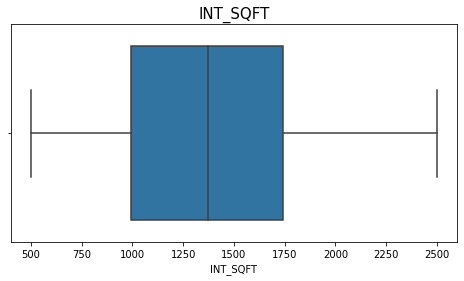

In [ ]:
# Detect and handle outlier
plt.figure(figsize = (8, 4))
sns.boxplot(df['INT_SQFT'])
plt.title('INT_SQFT', size = 15)
plt.show()

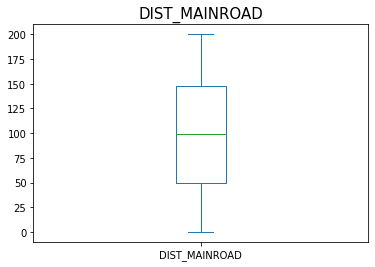

In [ ]:
df['DIST_MAINROAD'].plot(kind = 'box')
plt.title('DIST_MAINROAD', size = 15)
plt.show()

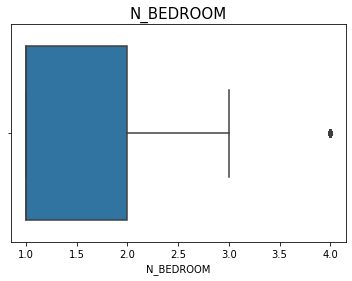

In [ ]:
sns.boxplot(df['N_BEDROOM'])
plt.title('N_BEDROOM', size = 15)
plt.show()

In [ ]:
df[df['N_BEDROOM'] > 3.5].shape

(254, 21)

In [ ]:
df[df['N_BEDROOM'] > 3.5]['N_BEDROOM'].unique()

array([4.])

Houses with 4 bedrooms are possible in Chennai. so, let it be as it is

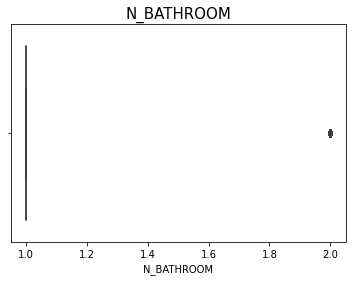

In [ ]:
sns.boxplot(df['N_BATHROOM'])
plt.title('N_BATHROOM', size = 15)
plt.show()

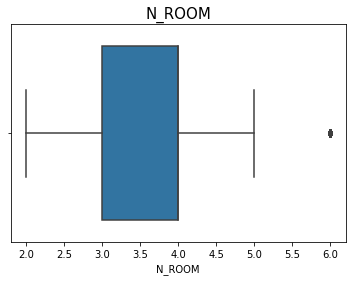

In [ ]:
sns.boxplot(df['N_ROOM'])
plt.title('N_ROOM', size = 15)
plt.show()

In [ ]:
df[df['N_ROOM'] > 5.5].shape

(254, 21)

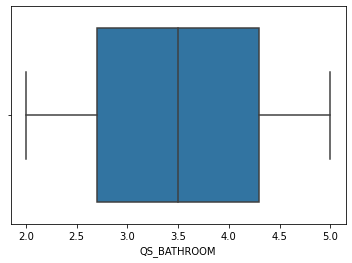

In [ ]:
sns.boxplot(df['QS_BATHROOM'])

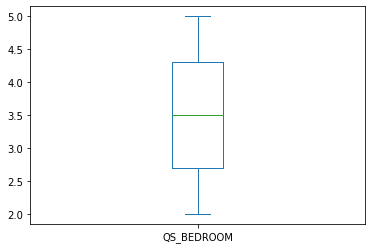

In [ ]:
df['QS_BEDROOM'].plot(kind = 'box')

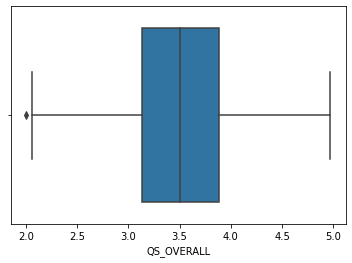

In [ ]:
sns.boxplot(df['QS_OVERALL'])

Before visualization, Let's confirm with the categorical values

In [ ]:
df['N_BEDROOM'] = df['N_BEDROOM'].astype('int')
df['N_BATHROOM'] = df['N_BATHROOM'].astype('int')

In [ ]:
# check once again spell mistakes are replaced correctly
for i in df.columns:
    if df[i].dtype == 'O':
        print(df[i].value_counts())
        print()

Chrompet      1702
Karapakam     1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

Adj Land       1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

NoSewer    3700
All Pub    1887
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64



###Exploratory Data Analysis

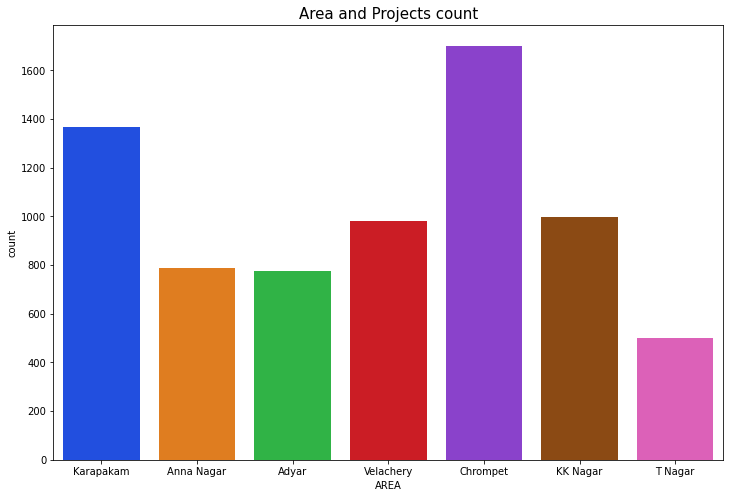

In [ ]:
plt.rcParams['figure.figsize'] = (12, 8)
sns.countplot(df['AREA'], palette='bright')
plt.title('Area and Projects count', size = 15)
plt.show()

**More projects done in Chrompet followed by Karapakkam and others, least projects done in T Nagar**

In [ ]:
df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values(by = 'SALES_PRICE')

,AREA,SALES_PRICE
4,Karapakam,7.340100e+06
0,Adyar,9.185668e+06
2,Chrompet,1.001381e+07
6,Velachery,1.104735e+07
3,KK Nagar,1.269623e+07
1,Anna Nagar,1.516820e+07
5,T Nagar,1.561674e+07


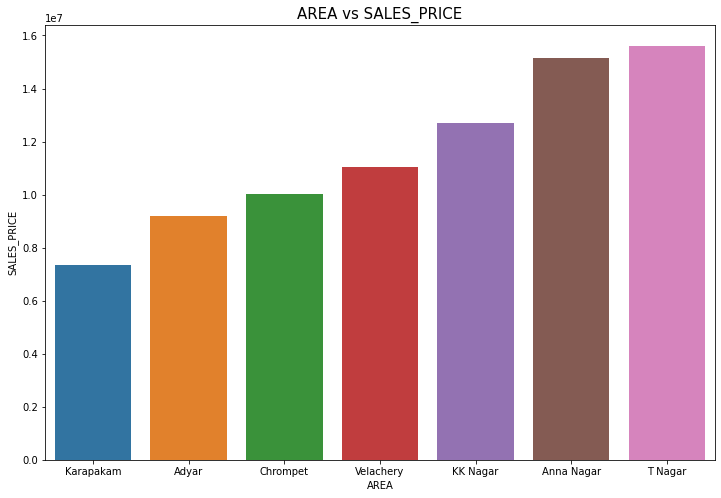

In [ ]:
sns.barplot(x = 'AREA', y = 'SALES_PRICE', data = df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values(by = 'SALES_PRICE'))
plt.title('AREA vs SALES_PRICE', size = 15)
plt.show()

**Anna Nagar and T Nagar has high sales prices compared to others<br>Karapakkam has least sales prices<br>There is a relationship present between AREA and Sales Price ==> Area is an important feature<br>There is a linear relationship between Area and Salesprice**

In [ ]:
df['PRICE_PER_SQFT'] = df['SALES_PRICE']/df['INT_SQFT']

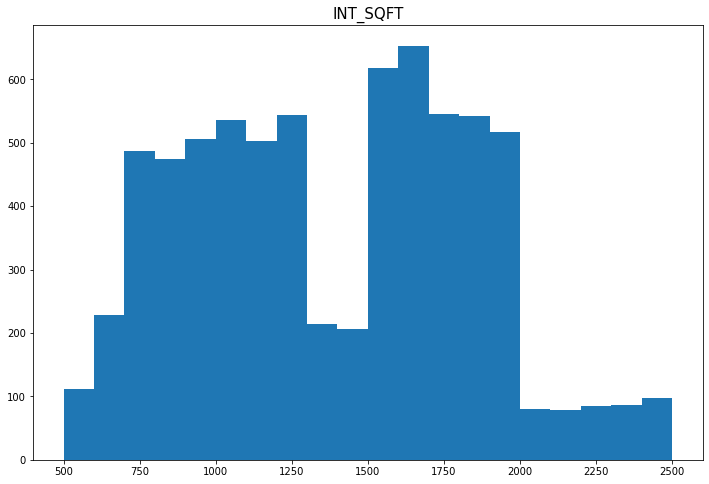

In [ ]:
plt.hist(df['INT_SQFT'], bins = 20)
plt.title('INT_SQFT', size = 15)
plt.show()

**It doesnt follows a normal distribution, less projects done above 2000 sqft**

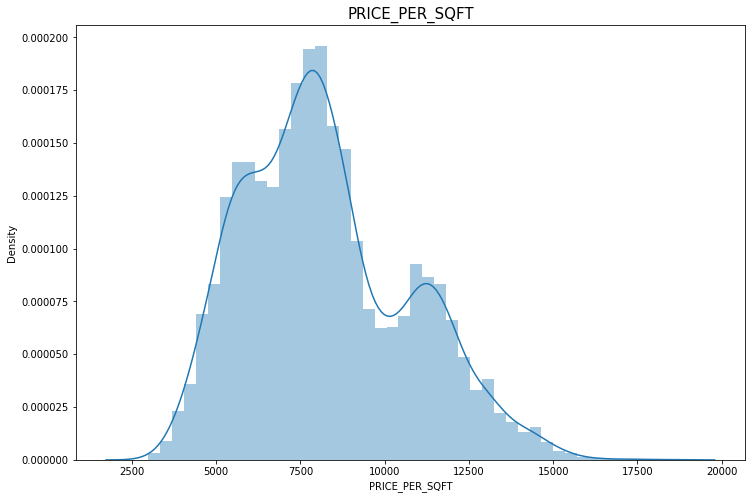

In [ ]:
sns.distplot(df['PRICE_PER_SQFT'])
plt.title('PRICE_PER_SQFT', size = 15)
plt.show()

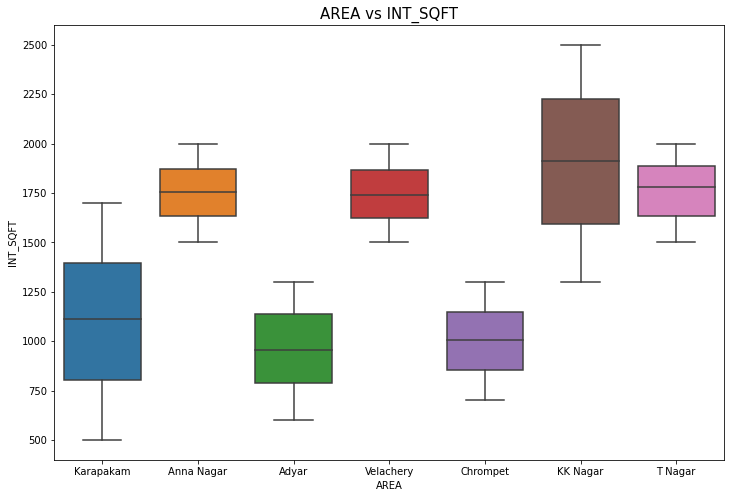

In [ ]:
sns.boxplot(df['AREA'], df['INT_SQFT'])
plt.title('AREA vs INT_SQFT', size = 15)
plt.show()

**Houses Sqft vary based on Area<br>KK Nagar has more number of houses with high sqft<br>Anna Nagar, Velacherry and T Nagar has a small range of sqft**

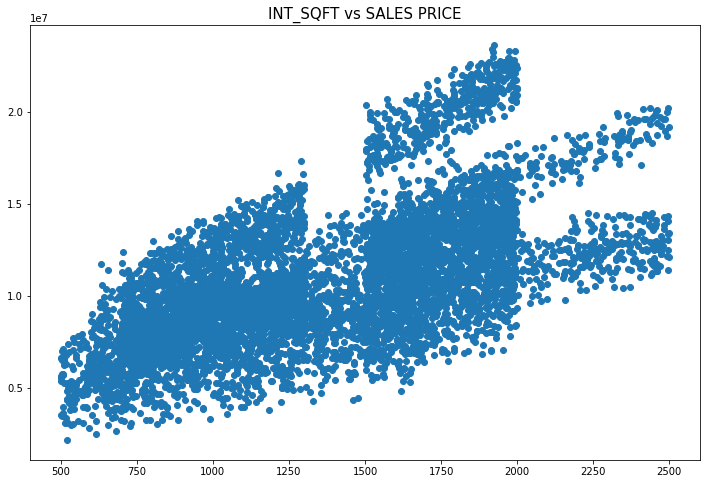

In [ ]:
plt.scatter(df['INT_SQFT'], df['SALES_PRICE'])
plt.title('INT_SQFT vs SALES PRICE', size = 15)
plt.show()

**There is a relationship between them<br>linear relationship between INT_SQFT and SalesPrice**

In [ ]:
# to get year from the date
df['SALE_YEAR'] = df['DATE_SALE'].dt.year

In [ ]:
df['BUILD_YEAR'] = df['DATE_BUILD'].dt.year

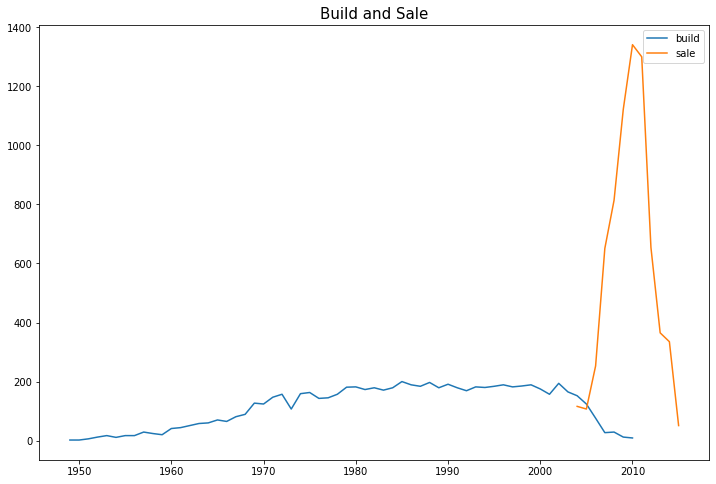

In [ ]:
# create new dataframe by group them based on date and count sale and build
df_sale = df.groupby('SALE_YEAR')['AREA'].agg([('sale_year', 'count')])
df_build = df.groupby('BUILD_YEAR')['AREA'].agg([('build_year', 'count')])

df_build_sale = df_build.merge(df_sale, how = 'outer', left_on=df_build.index, right_on=df_sale.index)
plt.plot(df_build_sale['key_0'], df_build_sale['build_year'], label = 'build')
plt.plot(df_build_sale['key_0'], df_build_sale['sale_year'], label = 'sale')
plt.title('Build and Sale', size = 15)
plt.legend()
plt.show()

**Houses built from around 1949 to 2010 and sold in huge number within a short period of 11 years from 2004 to 2015**

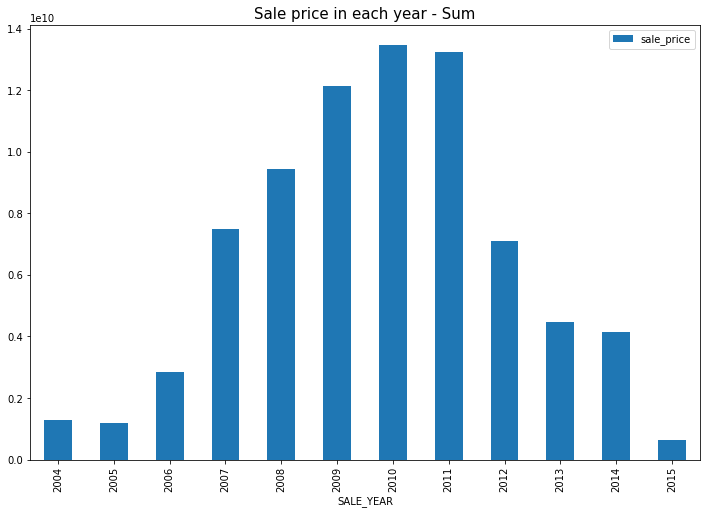

In [ ]:
df.groupby('SALE_YEAR')['SALES_PRICE'].agg([('sale_price', 'sum')]).plot(kind = 'bar')
plt.title('Sale price in each year - Sum', size = 15)
plt.show()

**huge number of house sale happened in 2009 to 2011**

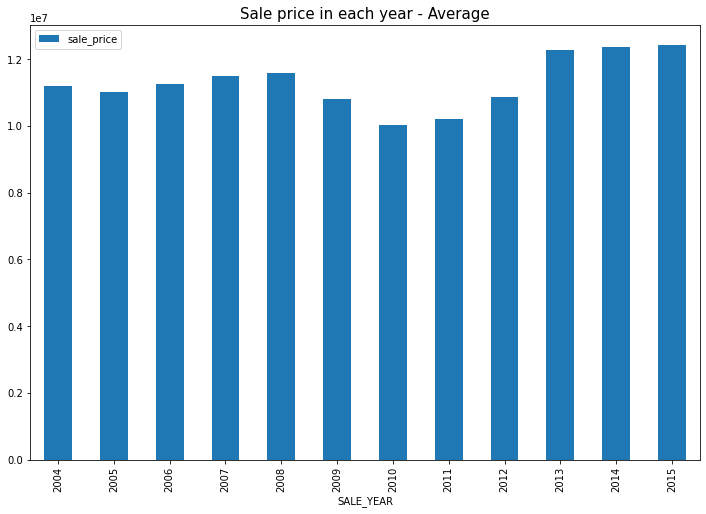

In [ ]:
df.groupby('SALE_YEAR')['SALES_PRICE'].agg([('sale_price', 'mean')]).plot(kind = 'bar')
plt.title('Sale price in each year - Average', size = 15)
plt.show()

**Even more sold in 2009 - 2011 the average are lower when compared to other years**

In [ ]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'PRICE_PER_SQFT', 'SALE_YEAR', 'BUILD_YEAR'],
      dtype='object')

In [ ]:
df['SALE_MONTH'] = df['DATE_SALE'].dt.month
df['BUILD_MONTH'] = df['DATE_BUILD'].dt.month

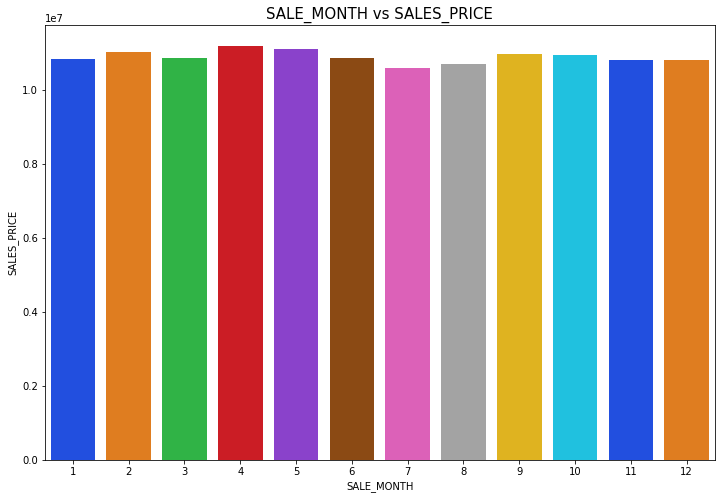

In [ ]:
sns.barplot(x = 'SALE_MONTH', y = 'SALES_PRICE', data = df.groupby('SALE_MONTH')['SALES_PRICE'].mean().reset_index().sort_values(by = 'SALES_PRICE'), palette = 'bright')
plt.title('SALE_MONTH vs SALES_PRICE', size = 15)
plt.show()

**There is no relationship between them.<br>There is no linear relationship between Sale Month and Sales price**

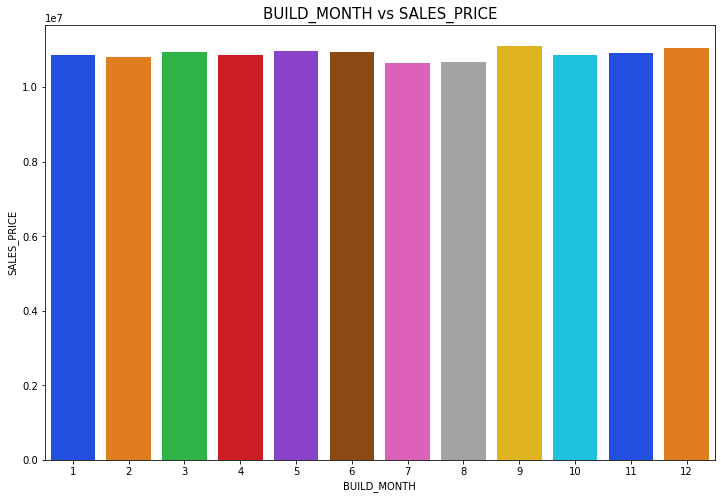

In [ ]:
sns.barplot(x = 'BUILD_MONTH', y = 'SALES_PRICE', data = df.groupby('BUILD_MONTH')['SALES_PRICE'].mean().reset_index().sort_values(by = 'SALES_PRICE'), palette = 'bright')
plt.title('BUILD_MONTH vs SALES_PRICE', size = 15)
plt.show()

**There is no relationship between them.<br>There is no linear relationship between Build Month and Sales price**

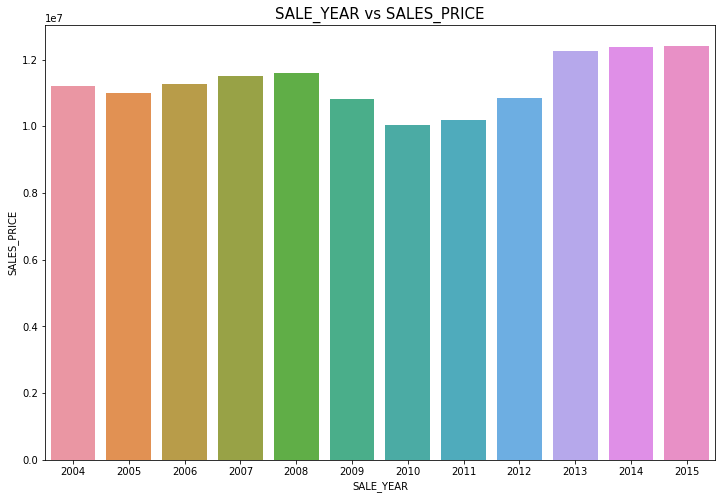

In [ ]:
sns.barplot(x = 'SALE_YEAR', y = 'SALES_PRICE', data = df.groupby('SALE_YEAR')['SALES_PRICE'].mean().reset_index().sort_values(by = 'SALES_PRICE'))
plt.title('SALE_YEAR vs SALES_PRICE', size = 15)
plt.show()

**There is no relationship between them.<br>There is no linear relationship between Sale year and Sales price**

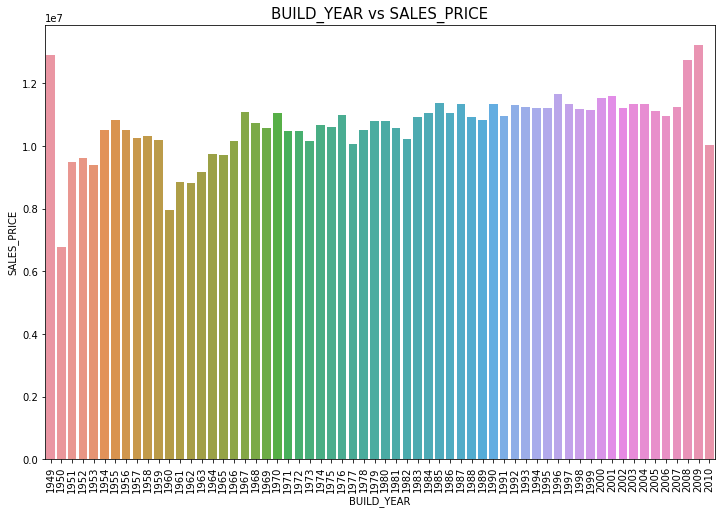

In [ ]:
sns.barplot(x = 'BUILD_YEAR', y = 'SALES_PRICE', data = df.groupby('BUILD_YEAR')['SALES_PRICE'].mean().reset_index().sort_values(by = 'BUILD_YEAR'))
plt.title('BUILD_YEAR vs SALES_PRICE', size = 15)
plt.xticks(rotation = 90)
plt.show()

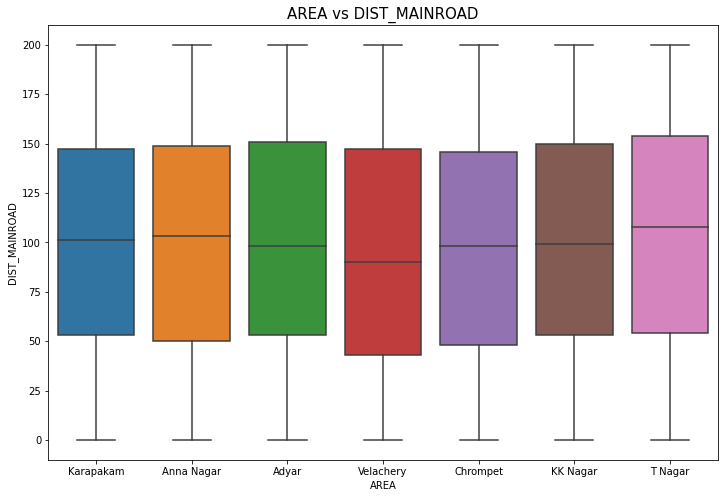

In [ ]:
sns.boxplot(df['AREA'], df['DIST_MAINROAD'])
plt.title('AREA vs DIST_MAINROAD', size = 15)
plt.show()

**All area has the distance range from 0 - 200 m to main road<br>Velachery has more number of projects nearer to mainroad(<100) when compared with others**

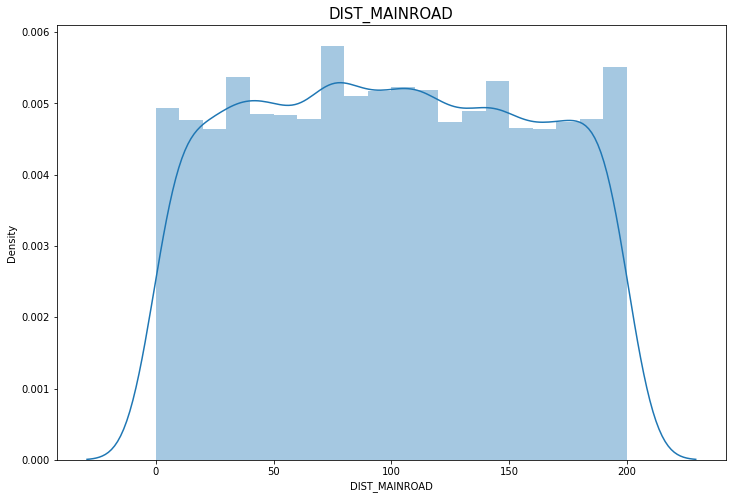

In [ ]:
sns.distplot(df['DIST_MAINROAD'])
plt.title('DIST_MAINROAD', size = 15)
plt.show()

**It doesnt follow a normal distribution**

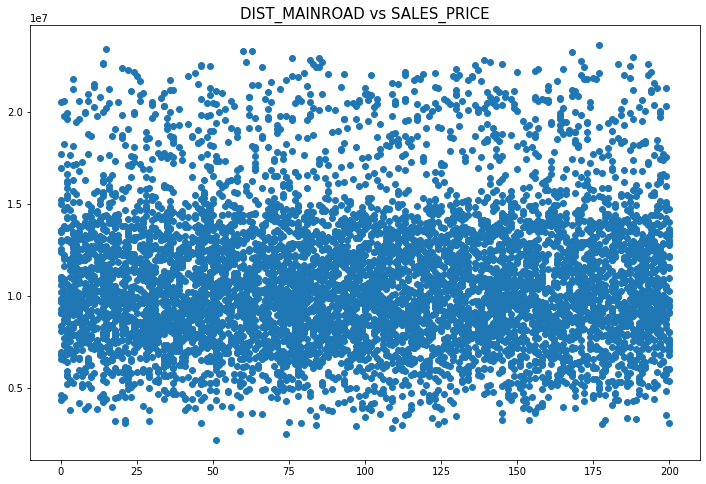

In [ ]:
plt.scatter(df['DIST_MAINROAD'], df['SALES_PRICE'])
plt.title('DIST_MAINROAD vs SALES_PRICE', size = 15)
plt.show()

**There is no relationship between them.<br>There is no relationship between distance from mainroad to sales price**

In [ ]:
corr = df[['DIST_MAINROAD', 'SALES_PRICE']].corr()
corr

,DIST_MAINROAD,SALES_PRICE
DIST_MAINROAD,1.000000,0.018783
SALES_PRICE,0.018783,1.000000


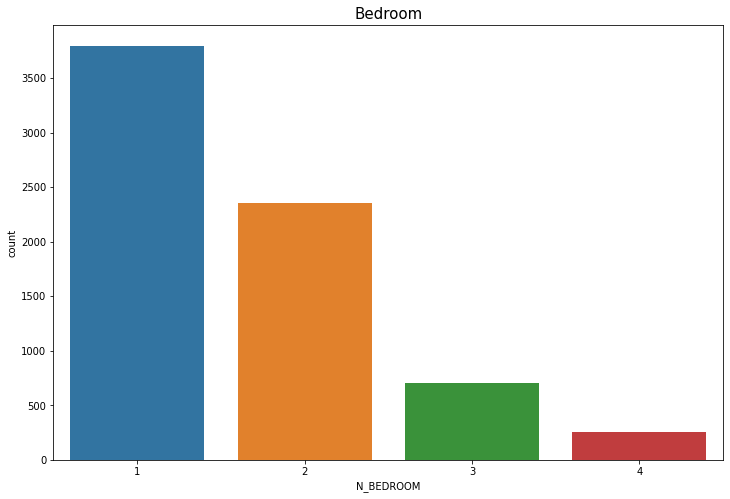

In [ ]:
sns.countplot(df['N_BEDROOM'])
plt.title('Bedroom', size = 15)
plt.show()

**More than 3500 houses built with single bed room, around 2500 houses built with 2 bedrooms, 500+ houses built with 3 bedrooms and less than 400 houses built with 4 bedrooms**

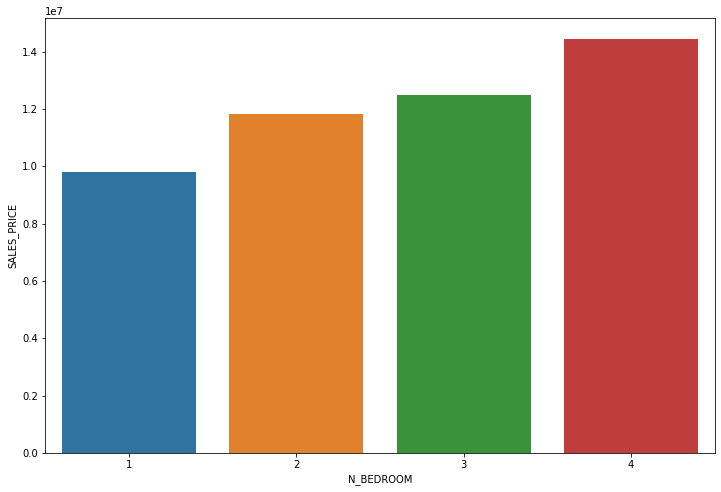

In [ ]:
sns.barplot(x = 'N_BEDROOM', y = 'SALES_PRICE', data = df.groupby('N_BEDROOM').mean().reset_index().sort_values('SALES_PRICE'))
plt.show()

**There is a relationship between total bedrooms and sales price.<br> If the total number of bedroom increses the sales price also increased<br>linear relatinship present between N_BEDROOM and SalesPrice**

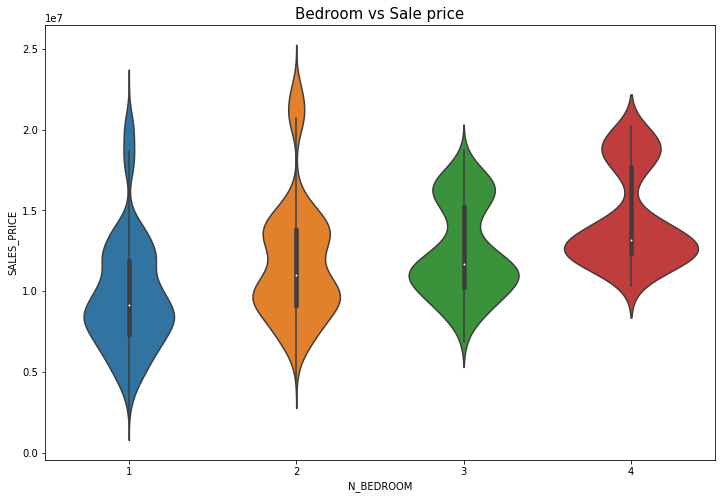

In [ ]:
sns.violinplot(df['N_BEDROOM'], df['SALES_PRICE'])
plt.title('Bedroom vs Sale price', size = 15)
plt.show()

**We can see the same above through violin plot<br>more the bedrooms higher ther sales price**

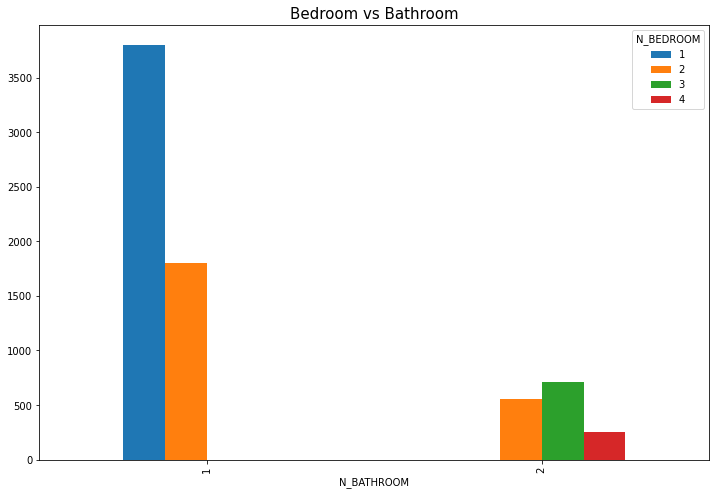

In [ ]:
pd.crosstab(df['N_BATHROOM'], df['N_BEDROOM']).plot(kind = 'bar')
plt.title('Bedroom vs Bathroom', size = 15)
plt.show()

**If the house has 2 bathrooms then it must have more than 1 bedroom**

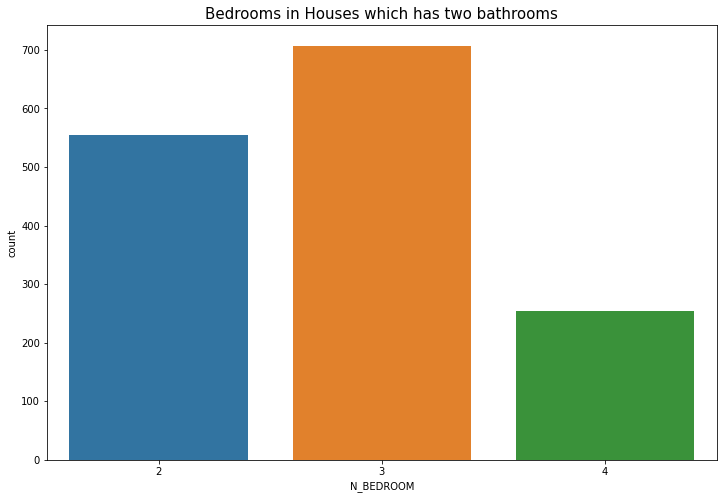

In [ ]:
sns.countplot(df[df['N_BATHROOM'] > 1]['N_BEDROOM'])
plt.title('Bedrooms in Houses which has two bathrooms', size = 15)
plt.show()

**Houses with 3 bedrooms are mostly built with 2 bathrooms**

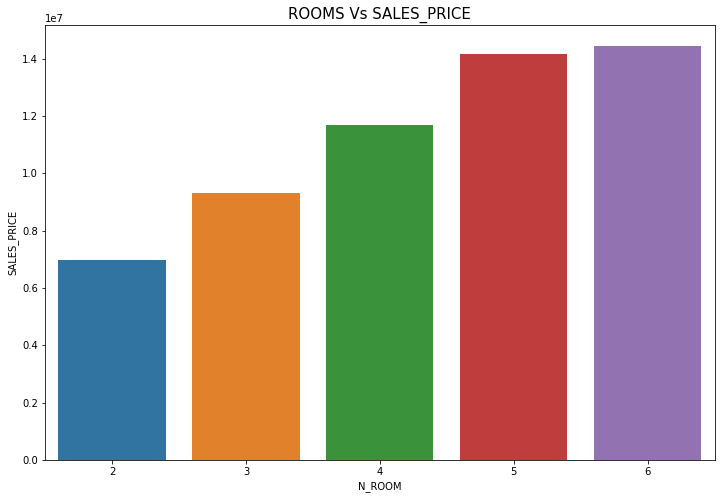

In [ ]:
sns.barplot(x = 'N_ROOM', y = 'SALES_PRICE', data = df.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE'))
plt.title('ROOMS Vs SALES_PRICE', size = 15)
plt.show()

**Total number of rooms makes the sale price higher<br>There is a relationship between them<br>There is a linear relationship between them**

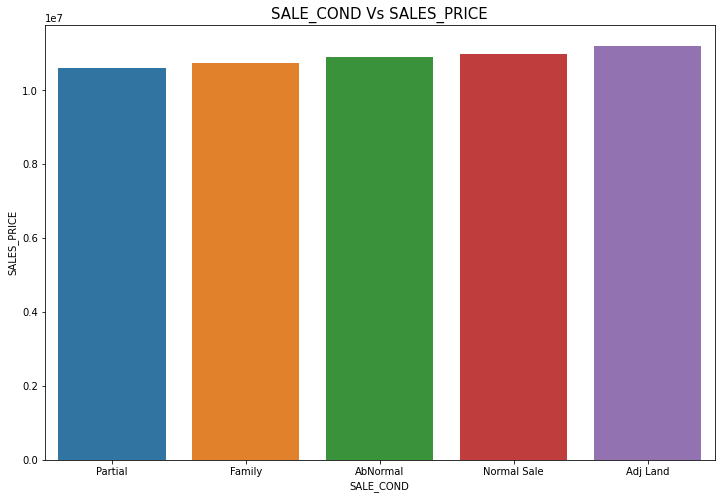

In [ ]:
sns.barplot(x = 'SALE_COND', y = 'SALES_PRICE', data = df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE'))
plt.title('SALE_COND Vs SALES_PRICE', size = 15)
plt.show()

**There is a relationship between them<br>There is  linear relationship between SALE_COND and Sales Price**

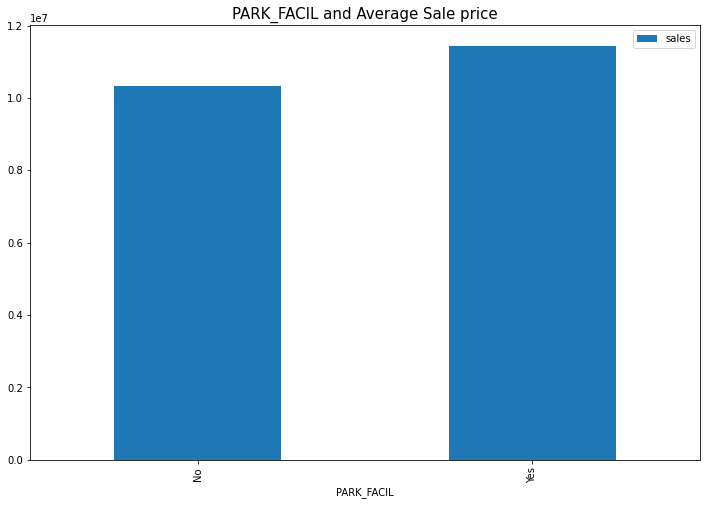

In [ ]:
df.groupby('PARK_FACIL')['SALES_PRICE'].agg([('sales', 'mean')]).plot(kind = 'bar')
plt.title('PARK_FACIL and Average Sale price', size = 15)
plt.show()

**Sale price of houses are higher if they have a parking fascility**

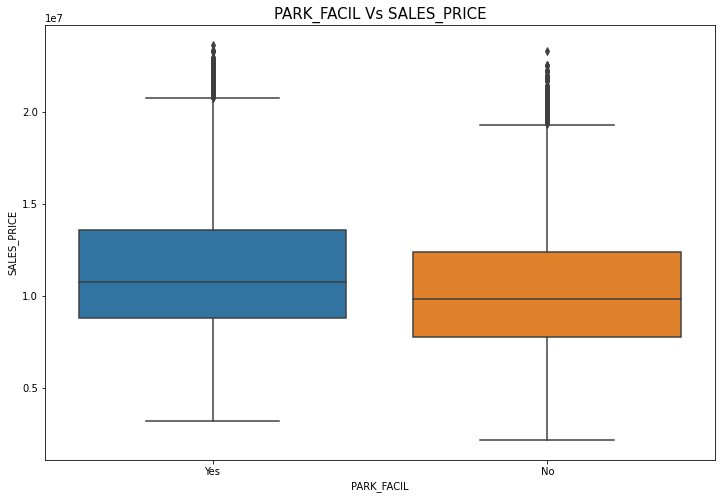

In [ ]:
sns.boxplot(df['PARK_FACIL'], df['SALES_PRICE'])
plt.title('PARK_FACIL Vs SALES_PRICE', size = 15)
plt.show()

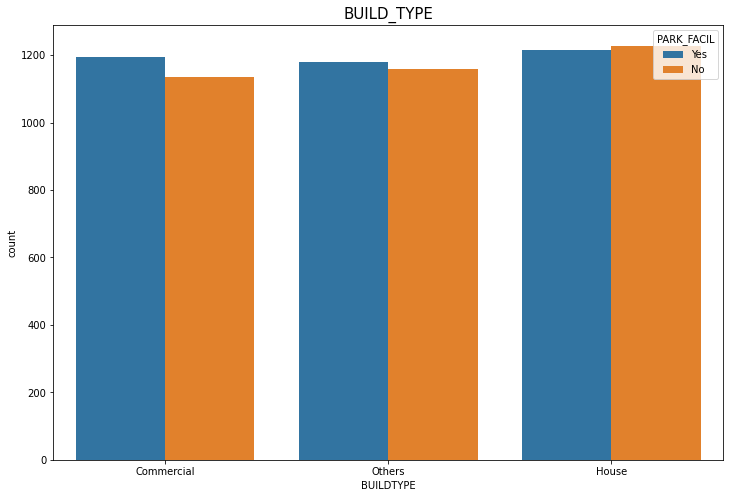

In [ ]:
sns.countplot(df['BUILDTYPE'], hue = df['PARK_FACIL'])
plt.title('BUILD_TYPE', size = 15)
plt.show()

**Commercial and Others have more parking fascility than the same which doesnt have parking fascility<br>More projects of houses built without parking fascility**

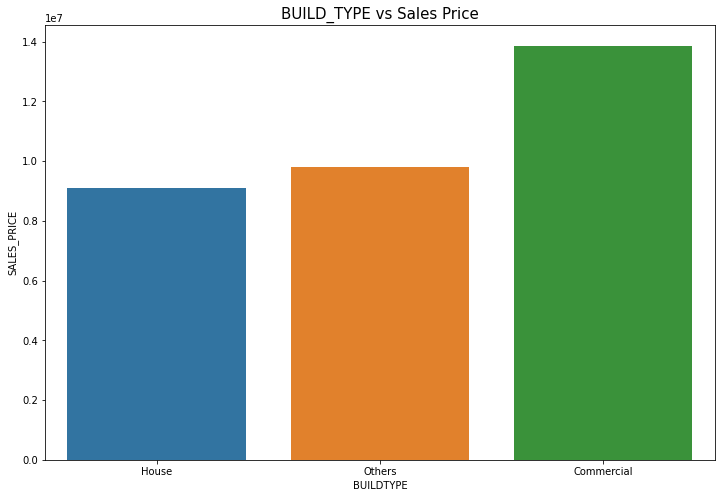

In [ ]:
sns.barplot(x = 'BUILDTYPE', y = 'SALES_PRICE', data = df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE'))
plt.title('BUILD_TYPE vs Sales Price', size = 15)
plt.show()

**Sale Price vary based on build type<br>If it is a House it has less sales price,<br>If it be Others it has higher sales price than house<br>If it be a Commercial it has the highest sales price<br>There is no linear relationship between build type and Sales Price**

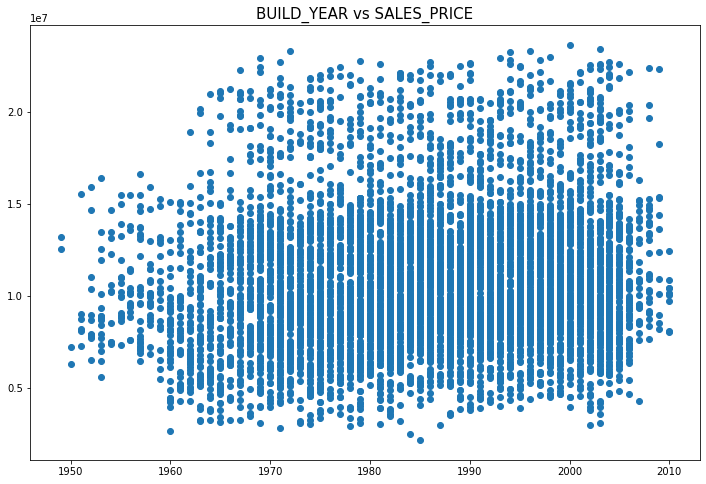

In [ ]:
plt.scatter(df['BUILD_YEAR'], df['SALES_PRICE'])
plt.title('BUILD_YEAR vs SALES_PRICE', size = 15)
plt.show()

**More houses are built between 1960 to 2005**

In [ ]:
#calculate the days between the project built date and sale date
df['DAYS_BEFORE_SALE'] = df['DATE_SALE'] - df['DATE_BUILD']

In [ ]:
df['DAYS_BEFORE_SALE'] = df['DAYS_BEFORE_SALE'].dt.days

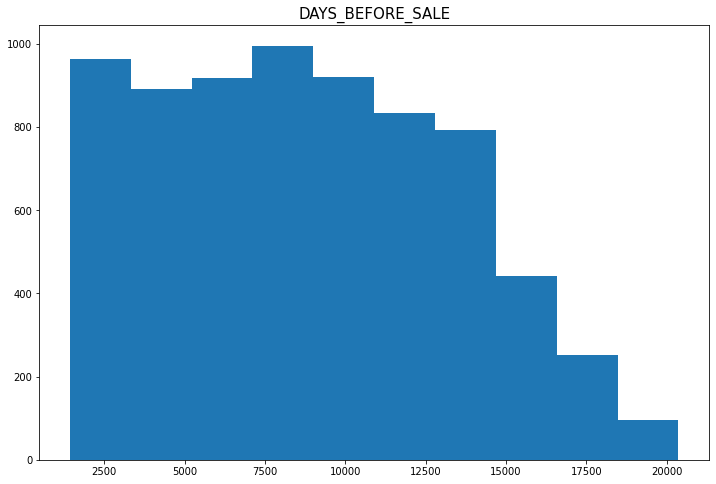

In [ ]:
plt.hist(df['DAYS_BEFORE_SALE'])
plt.title('DAYS_BEFORE_SALE', size = 15)
plt.show()

**Less number of houses are sold after a long time they built**

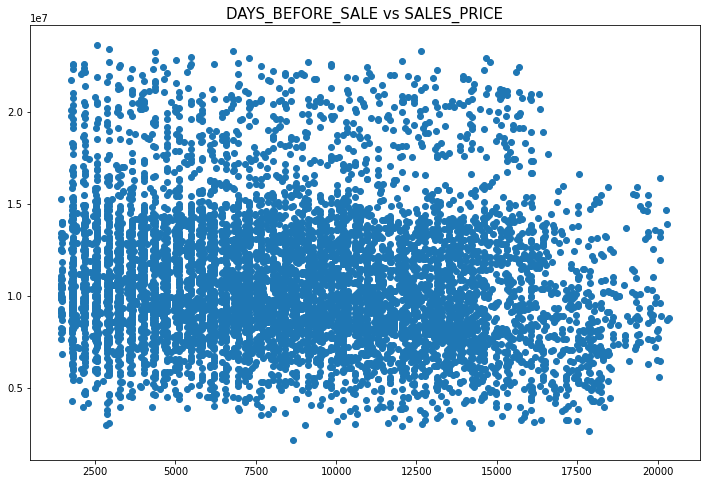

In [ ]:
plt.scatter(df['DAYS_BEFORE_SALE'], df['SALES_PRICE'])
plt.title('DAYS_BEFORE_SALE vs SALES_PRICE', size = 15)
plt.show()

**There is no relationship between them<br>There is no liear relationship between DAYS_BEFORE_SALE and Sales Price**

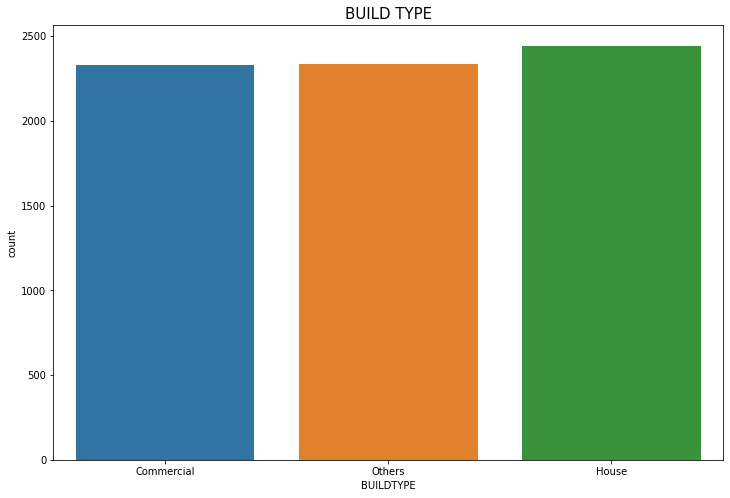

In [ ]:
sns.countplot(df['BUILDTYPE'])
plt.title('BUILD TYPE', size = 15)
plt.show()

**More number of houses built than Commercial and Others**

In [ ]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [ ]:
commercial_df = df[df['BUILDTYPE'] == 'Commercial']
others_df = df[df['BUILDTYPE'] == 'Others']
house_df = df[df['BUILDTYPE'] == 'House']
com_grp = commercial_df.groupby('BUILD_YEAR')['BUILD_YEAR'].agg([('commercial', 'count')])
oth_grp = others_df.groupby('BUILD_YEAR')['BUILD_YEAR'].agg([('others', 'count')])
hou_grp = house_df.groupby('BUILD_YEAR')['BUILD_YEAR'].agg([('house', 'count')])
grp_df = hou_grp.merge(oth_grp, how = 'outer', left_on = hou_grp.index, right_on = oth_grp.index).set_index('key_0')
grp_df = grp_df.merge(com_grp, how = 'outer', left_on = grp_df.index, right_on = com_grp.index).set_index('key_0')
grp_df.head(2)

,house,others,commercial
key_0,,,
1950,2.0,NaN,NaN
1951,2.0,3.0,1.0


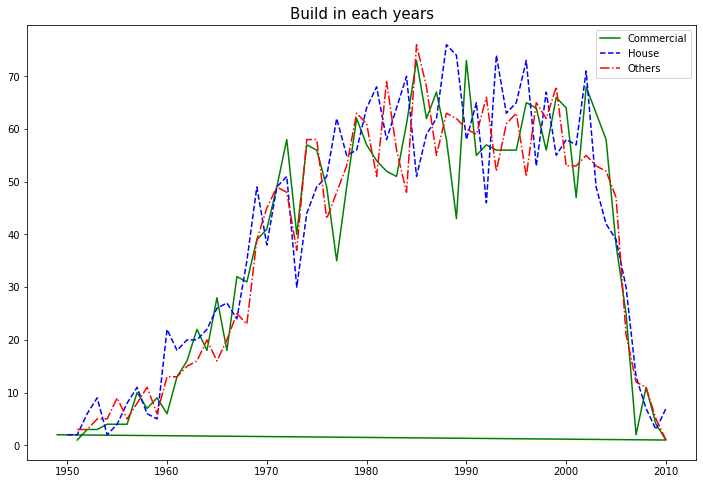

In [ ]:
plt.plot(grp_df['commercial'], color = 'green', label = 'Commercial')
plt.plot(grp_df['house'], 'b--', label = 'House')
plt.plot(grp_df['others'], 'r-.', label = 'Others')
plt.title('Build in each years', size = 15)
plt.legend()
plt.show()

**All build type of projects done almost in the same ratio in each year**

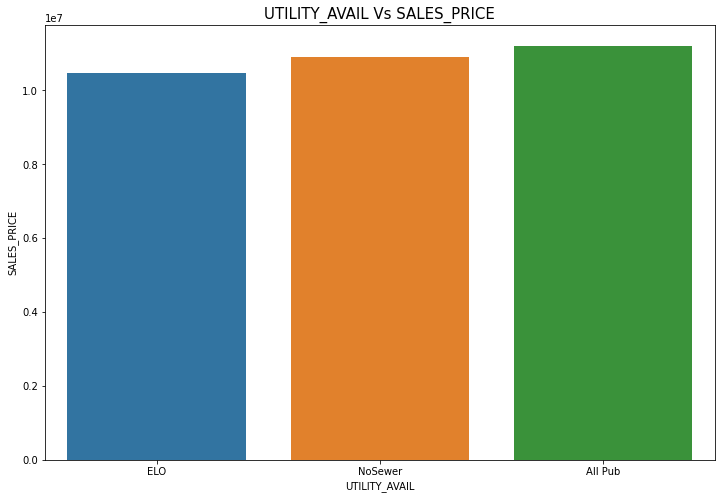

In [ ]:
sns.barplot(x = 'UTILITY_AVAIL', y = 'SALES_PRICE', data = df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE'))
plt.title('UTILITY_AVAIL Vs SALES_PRICE', size = 15)
plt.show()

**There is a relationship between them<br>There is a linear relationship betwen Utility avail and Sales price**

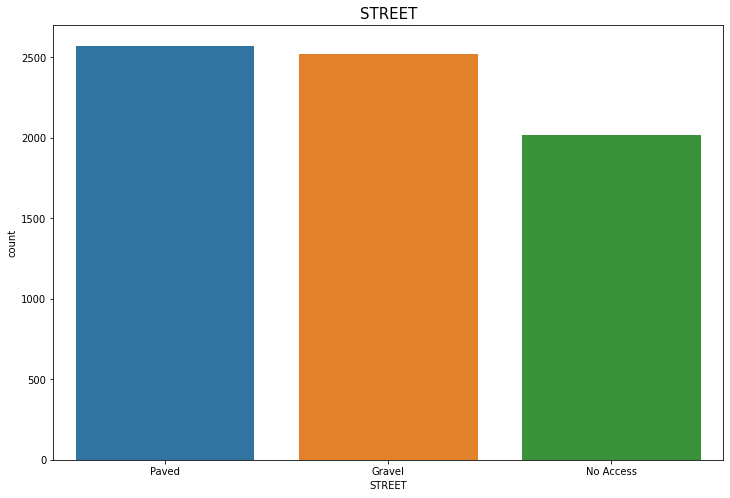

In [ ]:
sns.countplot(df['STREET'])
plt.title('STREET', size = 15)
plt.show()

**More projects done with Paved followed by Gravel and No Access in street**

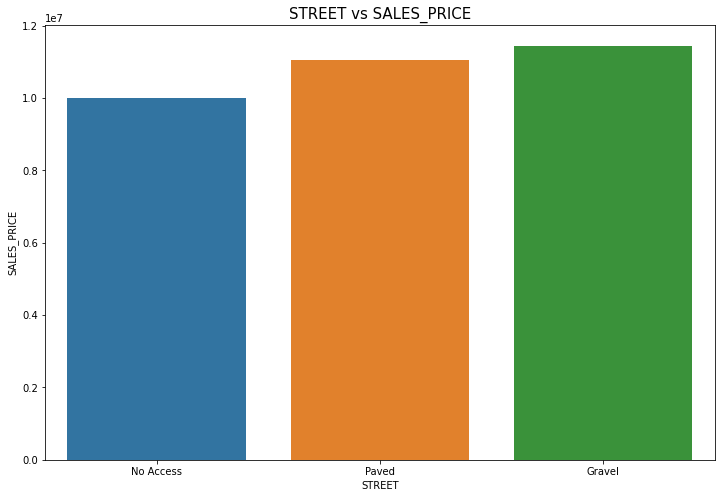

In [ ]:
sns.barplot(x = 'STREET', y = 'SALES_PRICE', data = df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE'))
plt.title('STREET vs SALES_PRICE', size = 15)
plt.show()

**Sales price of Project done in Gravel street are slightly higher than Paved and No Access<br>There is a relationship between them<br>There is a linear relationship between STREET and SALES_PRICE**

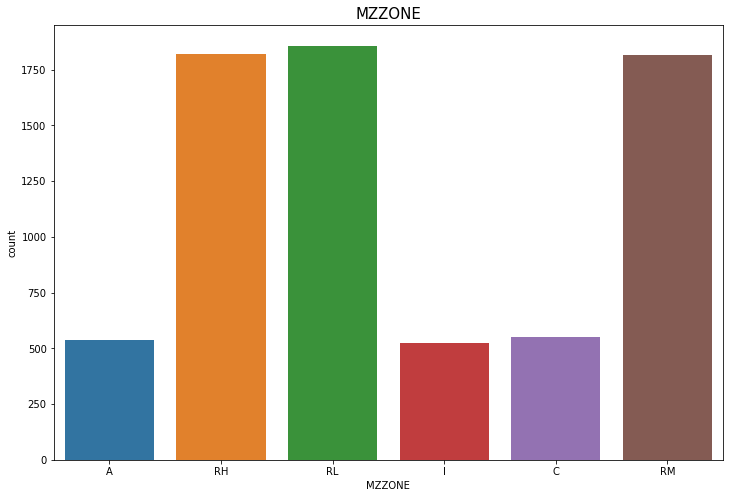

In [ ]:
sns.countplot(df['MZZONE'])
plt.title('MZZONE', size = 15)
plt.show()

**More projects done in RH, RL, RM MZZONE and less projects done in A, I, C MZZONES**

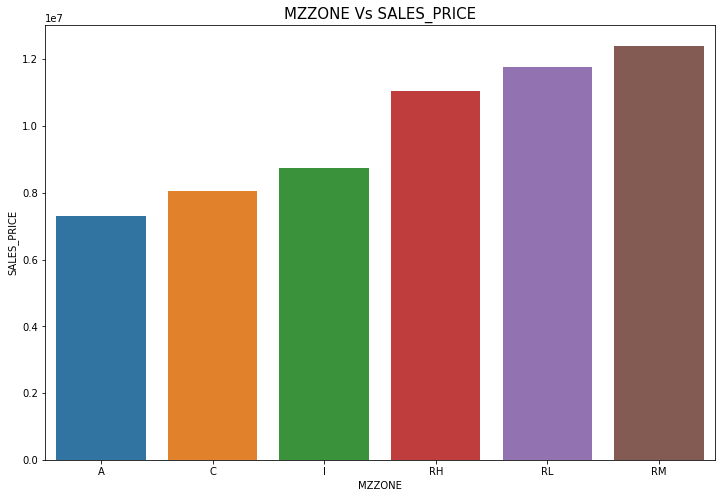

In [ ]:
sns.barplot(x = 'MZZONE', y = 'SALES_PRICE', data = df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('MZZONE'))
plt.title('MZZONE Vs SALES_PRICE', size = 15)
plt.show()

**Sale price of Projets vary based on MZZONE<br>There is a relationship between them<br>There is a linear relationship between MZZONE and Sales Price**

**RM has high sales price followed by RL, RH, I, C and A on an average**

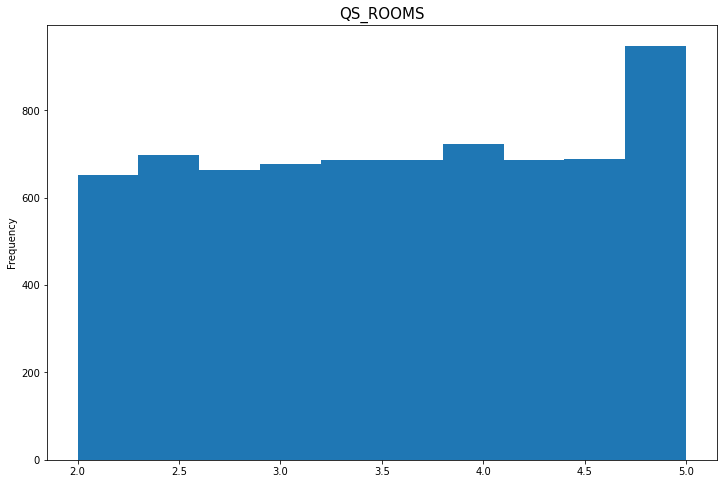

In [ ]:
df['QS_ROOMS'].plot(kind = 'hist')
plt.title('QS_ROOMS', size = 15)
plt.show()

**Masked data in the range of 2 - 5**

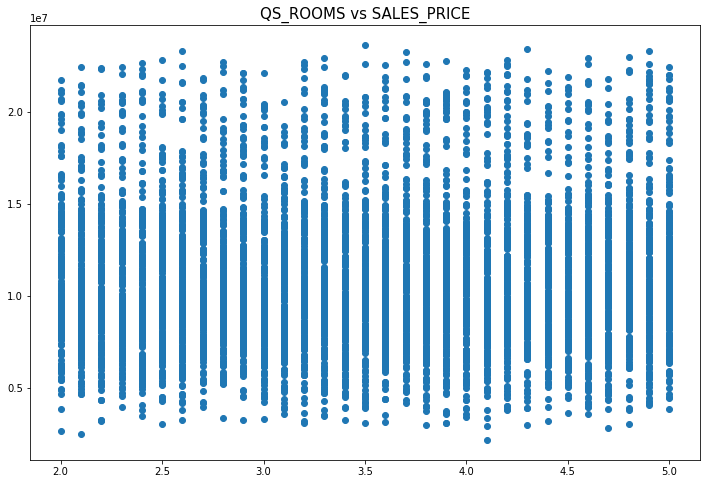

In [ ]:
plt.scatter(df['QS_ROOMS'], df['SALES_PRICE'])
plt.title('QS_ROOMS vs SALES_PRICE', size = 15)
plt.show()

**There is no relationship between above masked feature and target varibale**

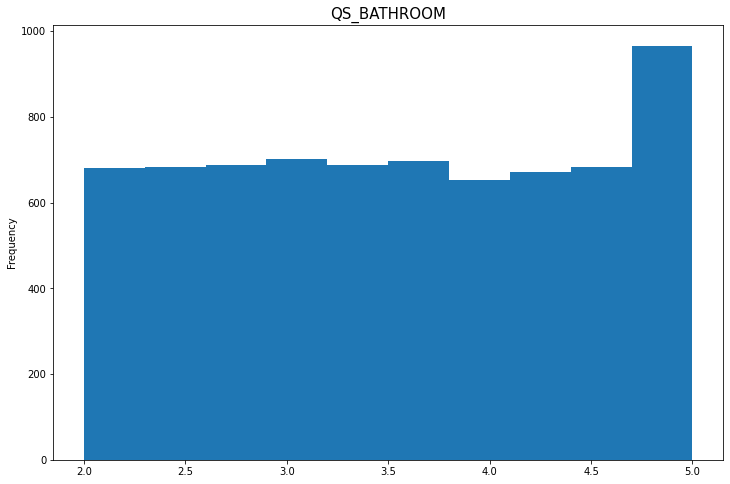

In [ ]:
df['QS_BATHROOM'].plot(kind = 'hist')
plt.title('QS_BATHROOM', size = 15)
plt.show()

**Masked data has the range between 2 to 5**

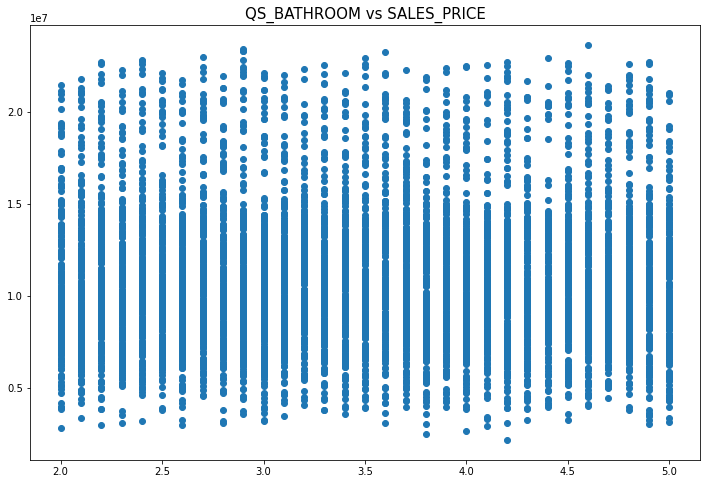

In [ ]:
plt.scatter(df['QS_BATHROOM'], df['SALES_PRICE'])
plt.title('QS_BATHROOM vs SALES_PRICE', size = 15)
plt.show()

**There is no relationship found from masked data to target feature**

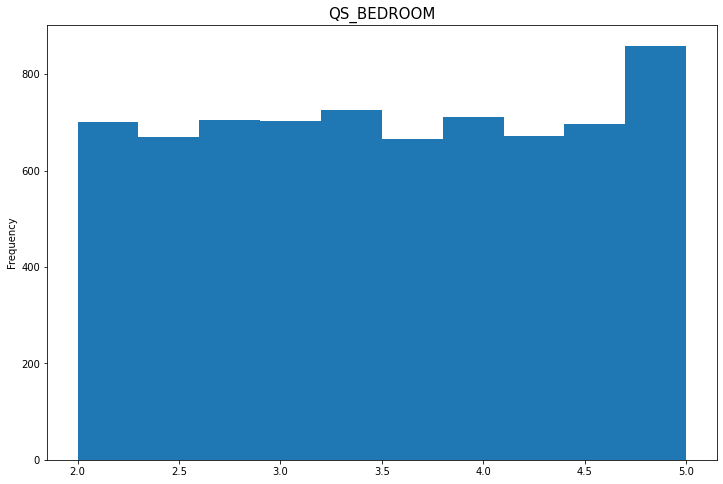

In [ ]:
df['QS_BEDROOM'].plot(kind = 'hist')
plt.title('QS_BEDROOM', size = 15)
plt.show()

**Masked data has the range between 2 to 5**

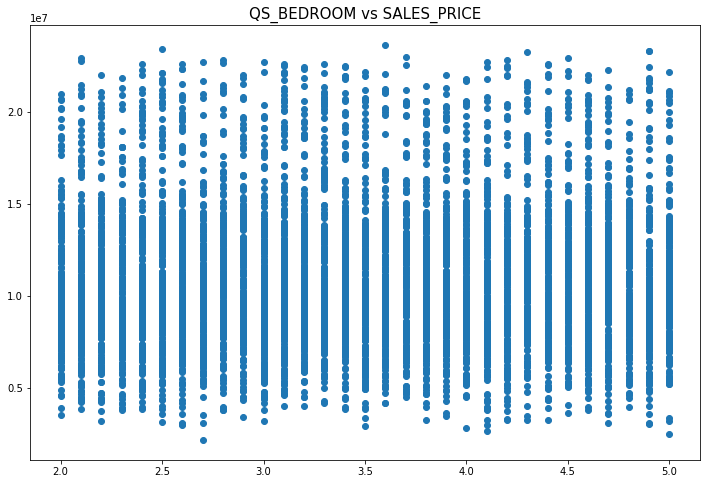

In [ ]:
plt.scatter(df['QS_BEDROOM'], df['SALES_PRICE'])
plt.title('QS_BEDROOM vs SALES_PRICE', size = 15)
plt.show()

**There is no relationship found from masked data to target feature**

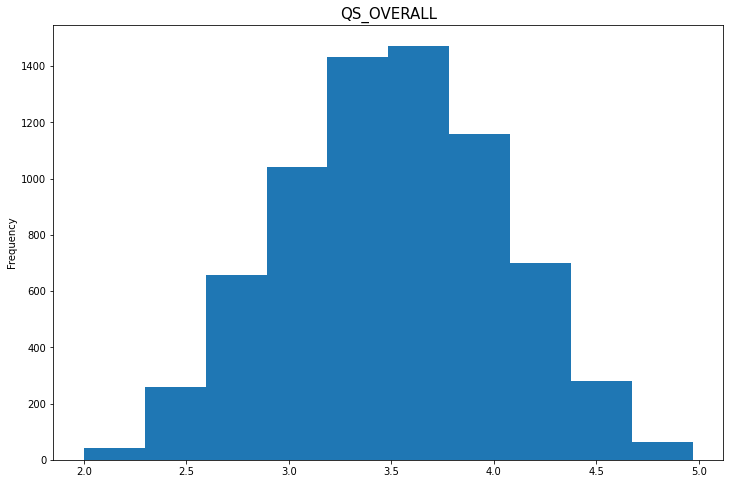

In [ ]:
df['QS_OVERALL'].plot(kind = 'hist')
plt.title('QS_OVERALL', size = 15)
plt.show()

**QS_OVERALL follows a normal distribution**

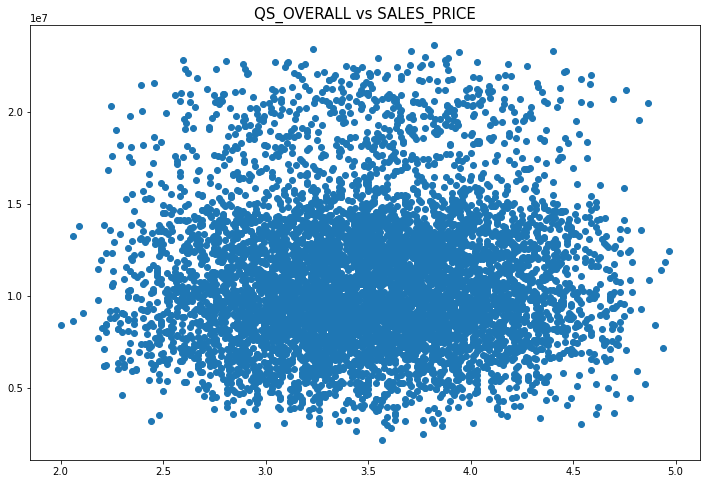

In [ ]:
plt.scatter(df['QS_OVERALL'], df['SALES_PRICE'])
plt.title('QS_OVERALL vs SALES_PRICE', size = 15)
plt.show()

**No relationship found between above two features<br>There is no linear relationship present between QS_OVERALL and Sales Price**

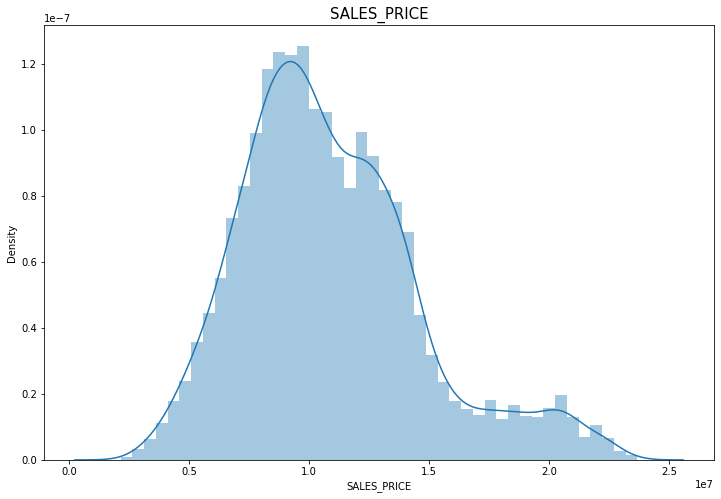

In [ ]:
sns.distplot(df['SALES_PRICE'])
plt.title('SALES_PRICE', size = 15)
plt.show()

**Target values are skewed rightly**

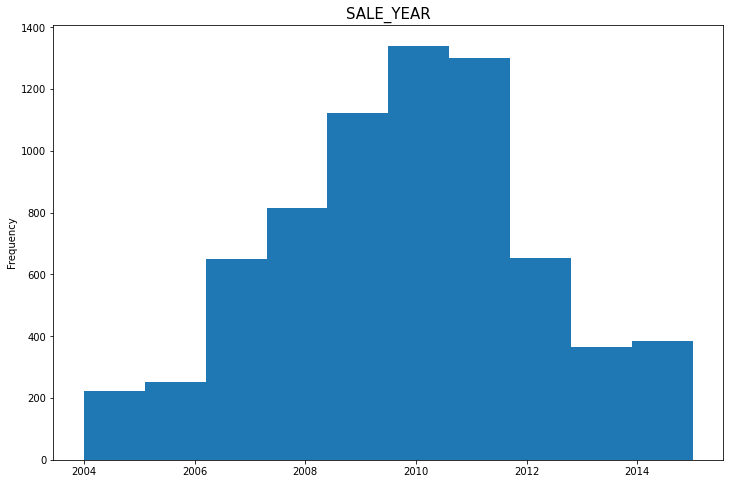

In [ ]:
df['SALE_YEAR'].plot(kind = 'hist')
plt.title('SALE_YEAR', size = 15)
plt.show()

**Least sale made from 2004 to 2006 and 2013 onwards**

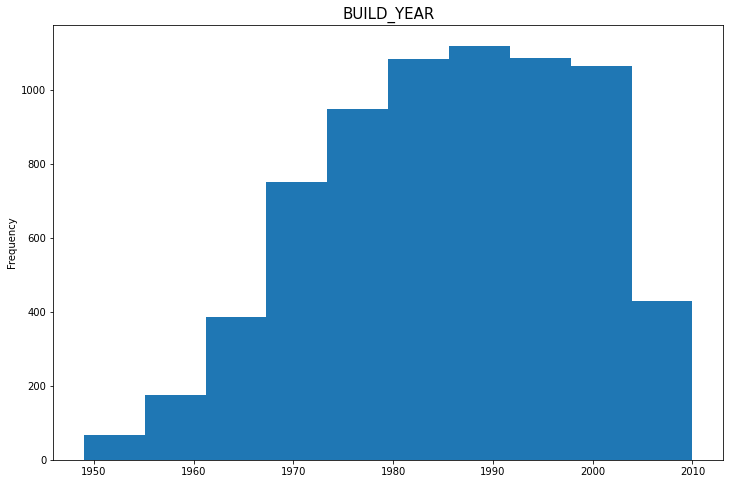

In [ ]:
df['BUILD_YEAR'].plot(kind = 'hist')
plt.title('BUILD_YEAR', size = 15)
plt.show()

**Less Projects are built at the early stage then got a rapid growth in 1970**

### Encoding

In [ ]:
df.head(2)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,PRICE_PER_SQFT,SALE_YEAR,BUILD_YEAR,SALE_MONTH,BUILD_MONTH,DAYS_BEFORE_SALE
0,Karapakam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,...,4.330,380000,144400,7600000,7569.721116,2011,1967,4,5,16031
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,...,3.765,760122,304049,21717770,10935.433031,2006,1995,12,12,4015


In [ ]:
df.groupby('AREA')['SALES_PRICE'].agg([('vals', 'mean')]).sort_values(by= 'vals')

,vals
AREA,
Karapakam,7.340100e+06
Adyar,9.185668e+06
Chrompet,1.001381e+07
Velachery,1.104735e+07
KK Nagar,1.269623e+07
Anna Nagar,1.516820e+07
T Nagar,1.561674e+07


In [ ]:
df['AREA'] = df['AREA'].replace({
    'Karapakam' : 0,
    'Adyar' : 1,
    'Chrompet' : 2,
    'Velachery' : 3,
    'KK Nagar' : 4,
    'Anna Nagar' : 5,
    'T Nagar' : 6
})

In [ ]:
df.groupby('SALE_COND')['SALES_PRICE'].mean('SALES_PRICE').reset_index().sort_values('SALES_PRICE')

,SALE_COND,SALES_PRICE
4,Partial,1.061637e+07
2,Family,1.073642e+07
0,AbNormal,1.091463e+07
3,Normal Sale,1.099418e+07
1,Adj Land,1.120931e+07


In [ ]:
df['SALE_COND'] = df['SALE_COND'].replace({
    'Partial':0,
    'Family':1,
    'AbNormal':2,
    'Normal Sale':3,
    'Adj Land': 4
})

In [ ]:
df['PARK_FACIL'] = df['PARK_FACIL'].replace({
    'No' : 0,
    'Yes' : 1
})

In [ ]:
build_type = pd.get_dummies(df['BUILDTYPE'], drop_first = True)

In [ ]:
df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean('SALES_PRICE').reset_index().sort_values('SALES_PRICE')

,UTILITY_AVAIL,SALES_PRICE
1,ELO,1.046941e+07
2,NoSewer,1.090923e+07
0,All Pub,1.121002e+07


In [ ]:
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace({
    'ELO':0,
    'NoSewer':1,
    'All Pub':2
})

In [ ]:
df.groupby('STREET')['SALES_PRICE'].mean('SALES_PRICE').reset_index().sort_values('SALES_PRICE')

,STREET,SALES_PRICE
1,No Access,1.000074e+07
2,Paved,1.105754e+07
0,Gravel,1.144462e+07


In [ ]:
df['STREET'] = df['STREET'].replace({
    'No Access':0,
    'Paved':1,
    'Gravel':2
})

In [ ]:
df.groupby('MZZONE')['SALES_PRICE'].mean('SALES_PRICE').reset_index().sort_values('SALES_PRICE')

,MZZONE,SALES_PRICE
0,A,7.292591e+06
1,C,8.052270e+06
2,I,8.738633e+06
3,RH,1.103997e+07
4,RL,1.176576e+07
5,RM,1.240707e+07


In [ ]:
df['MZZONE'] = df['MZZONE'].replace({
    'A' : 0,
    'C' : 1,
    'I' : 2,
    'RH' : 3,
    'RL' : 4,
    'RM' : 5
})

In [ ]:
df_new = pd.concat([df, build_type], axis = 1)

In [ ]:
df_new.head(2)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,COMMIS,SALES_PRICE,PRICE_PER_SQFT,SALE_YEAR,BUILD_YEAR,SALE_MONTH,BUILD_MONTH,DAYS_BEFORE_SALE,House,Others
0,0,1004,2011-04-05,131,1,1,3,2,1,1967-05-15,...,144400,7600000,7569.721116,2011,1967,4,5,16031,0,0
1,5,1986,2006-12-19,26,2,1,5,2,0,1995-12-22,...,304049,21717770,10935.433031,2006,1995,12,12,4015,0,0


In [ ]:
df_new.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'PRICE_PER_SQFT', 'SALE_YEAR', 'BUILD_YEAR',
       'SALE_MONTH', 'BUILD_MONTH', 'DAYS_BEFORE_SALE', 'House', 'Others'],
      dtype='object')

In [ ]:
df_new.drop(['DATE_SALE', 'DATE_BUILD', 'BUILDTYPE', 'SALE_MONTH', 'BUILD_MONTH', 'PRICE_PER_SQFT', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL'], axis = 1, inplace = True)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   AREA              7109 non-null   int64
 1   INT_SQFT          7109 non-null   int64
 2   DIST_MAINROAD     7109 non-null   int64
 3   N_BEDROOM         7109 non-null   int64
 4   N_BATHROOM        7109 non-null   int64
 5   N_ROOM            7109 non-null   int64
 6   SALE_COND         7109 non-null   int64
 7   PARK_FACIL        7109 non-null   int64
 8   UTILITY_AVAIL     7109 non-null   int64
 9   STREET            7109 non-null   int64
 10  MZZONE            7109 non-null   int64
 11  REG_FEE           7109 non-null   int64
 12  COMMIS            7109 non-null   int64
 13  SALES_PRICE       7109 non-null   int64
 14  SALE_YEAR         7109 non-null   int64
 15  BUILD_YEAR        7109 non-null   int64
 16  DAYS_BEFORE_SALE  7109 non-null   int64
 17  House             7109 non-null  

In [ ]:
df_new.head(2)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,SALE_YEAR,BUILD_YEAR,DAYS_BEFORE_SALE,House,Others
0,0,1004,131,1,1,3,2,1,2,1,0,380000,144400,7600000,2011,1967,16031,0,0
1,5,1986,26,2,1,5,2,0,2,2,3,760122,304049,21717770,2006,1995,4015,0,0


In [ ]:
df_new.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'SALE_YEAR', 'BUILD_YEAR',
       'DAYS_BEFORE_SALE', 'House', 'Others'],
      dtype='object')

**Reg_fee and Commision are only happened when the sale is done. So We cant consider them as an independant feature. Lets add them with Target feature**

In [ ]:
df_new['SALES_PRICE'] = df_new['REG_FEE'] + df_new['COMMIS'] + df_new['SALES_PRICE']

In [ ]:
df_new.drop(['REG_FEE', 'COMMIS'], axis = 1, inplace = True)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   AREA              7109 non-null   int64
 1   INT_SQFT          7109 non-null   int64
 2   DIST_MAINROAD     7109 non-null   int64
 3   N_BEDROOM         7109 non-null   int64
 4   N_BATHROOM        7109 non-null   int64
 5   N_ROOM            7109 non-null   int64
 6   SALE_COND         7109 non-null   int64
 7   PARK_FACIL        7109 non-null   int64
 8   UTILITY_AVAIL     7109 non-null   int64
 9   STREET            7109 non-null   int64
 10  MZZONE            7109 non-null   int64
 11  SALES_PRICE       7109 non-null   int64
 12  SALE_YEAR         7109 non-null   int64
 13  BUILD_YEAR        7109 non-null   int64
 14  DAYS_BEFORE_SALE  7109 non-null   int64
 15  House             7109 non-null   uint8
 16  Others            7109 non-null   uint8
dtypes: int64(15), uint8(2)
memory usa

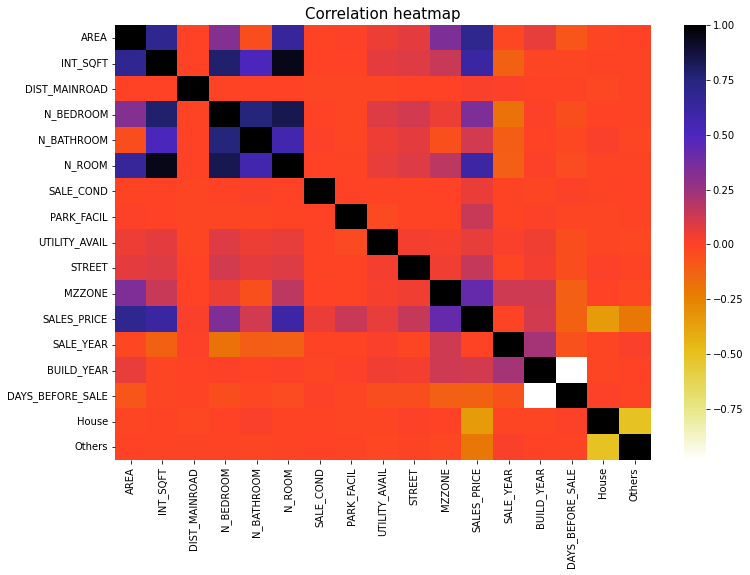

In [ ]:
sns.heatmap(df_new.corr(), cmap = plt.cm.CMRmap_r)
plt.title('Correlation heatmap', size = 15)
plt.show()

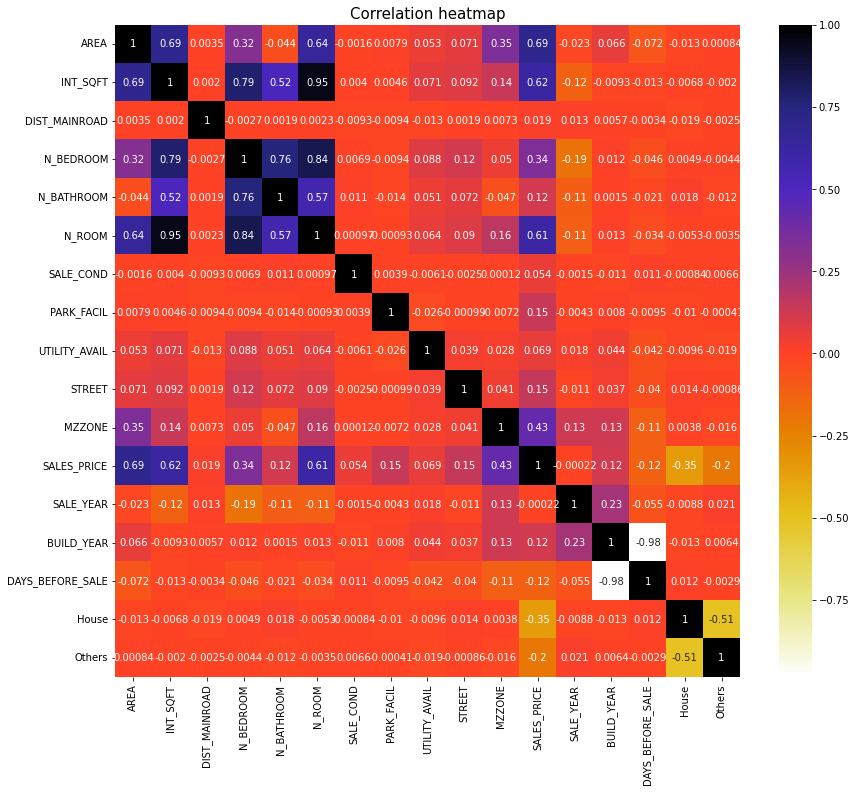

In [ ]:
plt.figure(figsize = (14, 12))
sns.heatmap(df_new.corr(), cmap = plt.cm.CMRmap_r, annot = True)
plt.title('Correlation heatmap', size = 15)
plt.show()

**Positive correlation found between the target feature with AREA, INT_SQFT, N_ROOMS, MZZONE and N_BEDROOM**

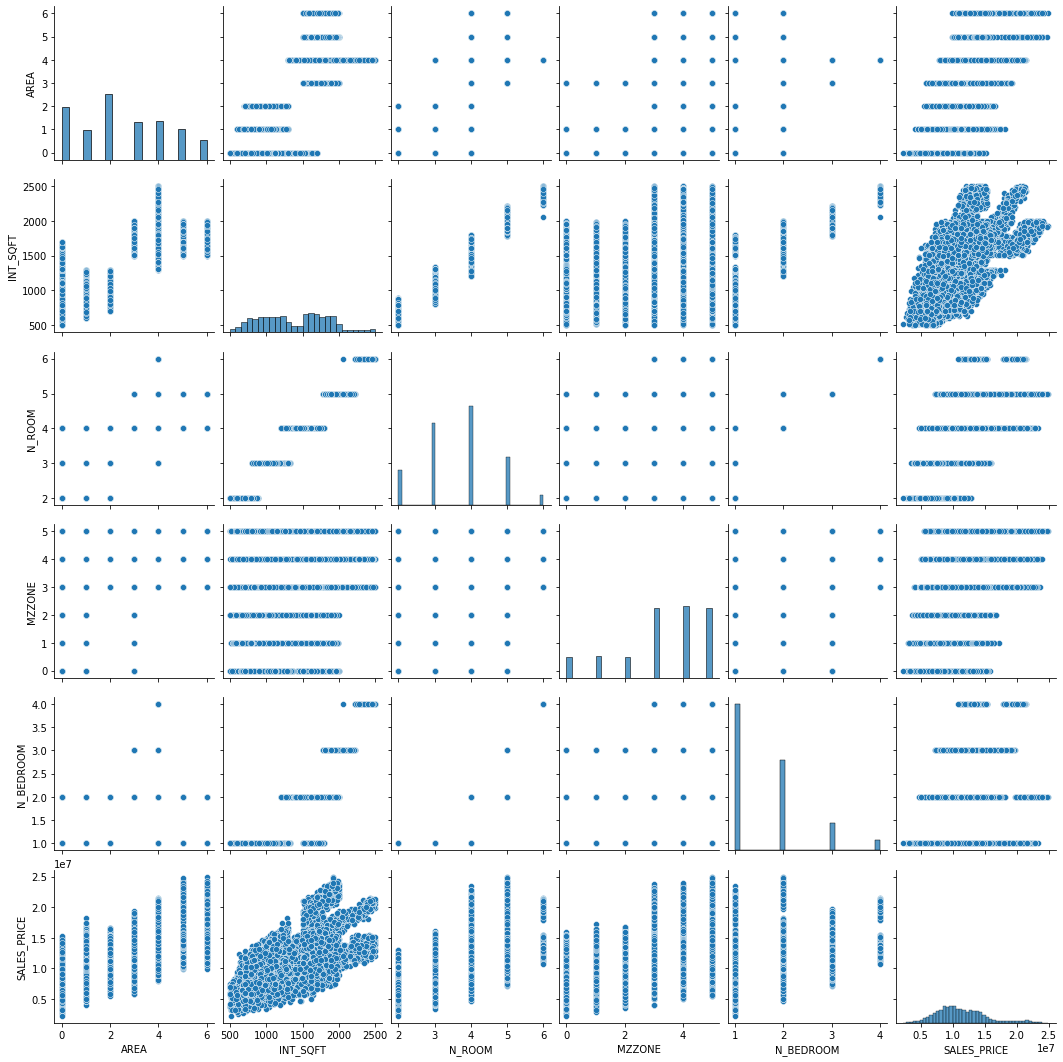

In [ ]:
# pairplot with correlated features
sns.pairplot(df_new[['AREA', 'INT_SQFT','N_ROOM', 'MZZONE', 'N_BEDROOM', 'SALES_PRICE']])
plt.show()

**Everything above shows that higher the value higher ther sale price<br>There is a relationship between independant feature and target feature**

In [ ]:
df_new.isnull().sum()

AREA                0
INT_SQFT            0
DIST_MAINROAD       0
N_BEDROOM           0
N_BATHROOM          0
N_ROOM              0
SALE_COND           0
PARK_FACIL          0
UTILITY_AVAIL       0
STREET              0
MZZONE              0
SALES_PRICE         0
SALE_YEAR           0
BUILD_YEAR          0
DAYS_BEFORE_SALE    0
House               0
Others              0
dtype: int64

###Model

In [ ]:
X = df_new.drop(['SALES_PRICE'], axis = 1).copy()
y = df_new['SALES_PRICE'].copy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'SALE_YEAR', 'BUILD_YEAR', 'DAYS_BEFORE_SALE', 'House',
       'Others'],
      dtype='object')

In [ ]:
# transform features which dont have linear relationship with target feature
X_train['SALE_YEAR'] = sc.fit_transform(X_train[['SALE_YEAR']])
X_test['SALE_YEAR'] = sc.transform(X_test[['SALE_YEAR']])

X_train['DIST_MAINROAD'] = sc.fit_transform(X_train[['DIST_MAINROAD']])
X_test['DIST_MAINROAD'] = sc.transform(X_test[['DIST_MAINROAD']])

X_train['BUILD_YEAR'] = sc.fit_transform(X_train[['BUILD_YEAR']])
X_test['BUILD_YEAR'] = sc.transform(X_test[['BUILD_YEAR']])

X_train['DAYS_BEFORE_SALE'] = sc.fit_transform(X_train[['DAYS_BEFORE_SALE']])
X_test['DAYS_BEFORE_SALE'] = sc.transform(X_test[['DAYS_BEFORE_SALE']])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model = LinearRegression()

In [ ]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = lr_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
np.sqrt(mean_squared_error(y_test, pred))

1042104.4478153335

In [ ]:
r2_score(y_test, pred)

0.9267075045071602

---

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
var_thres = VarianceThreshold(threshold=.5)
var_thres.fit(X_train)

VarianceThreshold(threshold=0.5)

In [ ]:
var_thres.get_support()

array([ True,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True,  True,  True, False, False])

In [ ]:
constant_names = [column for column in X_train.columns if column not in X.columns[var_thres.get_support()]]
constant_names

['N_BATHROOM', 'PARK_FACIL', 'UTILITY_AVAIL', 'House', 'Others']

In [ ]:
X_train.columns[var_thres.get_support()]

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_ROOM', 'SALE_COND',
       'STREET', 'MZZONE', 'SALE_YEAR', 'BUILD_YEAR', 'DAYS_BEFORE_SALE'],
      dtype='object')

In [ ]:
X_train_sup = X_train[X_train.columns[var_thres.get_support()]]
X_test_sup = X_test[X_test.columns[var_thres.get_support()]]

build model with selected features

In [ ]:
lr = LinearRegression()
lr.fit(X_train_sup, y_train)

LinearRegression()

In [ ]:
pred = lr.predict(X_test_sup)

In [ ]:
np.sqrt(mean_squared_error(y_test, pred))

2423834.360529389

In [ ]:
r2_score(y_test, pred)

0.6035002794938624

Selected features gives less r2 score so lets use all values to build ML model

Lets try all regressor to fit and predict

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor

In [ ]:
lin_reg = LinearRegression()
svr = SVR()
sgdr = SGDRegressor()
rr = RandomForestRegressor()
xgb = XGBRegressor()
d_tree = DecisionTreeRegressor()

In [ ]:
lin_reg.fit(X_train, y_train)
pred = lin_reg.predict(X_test)
print('mse')
print(np.sqrt(mean_squared_error(y_test, pred)))
print('r2')
print(r2_score(y_test, pred))

mse
1042104.4478153335
r2
0.9267075045071602


In [ ]:
d_tree.fit(X_train, y_train)
pred = d_tree.predict(X_test)
print('mse')
print(np.sqrt(mean_squared_error(y_test, pred)))
print('r2')
print(r2_score(y_test, pred))

mse
735993.0526764904
r2
0.9634418307005723


In [ ]:
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print('mse')
print(np.sqrt(mean_squared_error(y_test, pred)))
print('r2')
print(r2_score(y_test, pred))

[14:18:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
mse
478837.48072538734
r2
0.9845256190424847


In [ ]:
svr.fit(X_train, y_train)
pred = svr.predict(X_test)
print('mse')
print(np.sqrt(mean_squared_error(y_test, pred)))
print('r2')
print(r2_score(y_test, pred))

mse
3875288.6572532016
r2
-0.013549874767527559


In [ ]:
sgdr.fit(X_train, y_train)
pred = sgdr.predict(X_test)
print('mse')
print(np.sqrt(mean_squared_error(y_test, pred)))
print('r2')
print(r2_score(y_test, pred))

mse
614151460553186.0
r2
-2.5455872552375052e+16


In [ ]:
rr.fit(X_train, y_train)
pred = rr.predict(X_test)
print('mse')
print(np.sqrt(mean_squared_error(y_test, pred)))
print('r2')
print(r2_score(y_test, pred))

mse
463528.2910325118
r2
0.9854992821567488


Good r2 score with Random forest regressor

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(rr, X_train, y_train, scoring = 'r2', cv = 5)

array([0.98273026, 0.98503755, 0.98348359, 0.9846856 , 0.98363311])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, 11)]
#max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rcv = RandomizedSearchCV(rr, random_grid, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)

In [ ]:
rcv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rcv.best_score_

0.9829649176787011

In [ ]:
rcv.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
rf_regressor = RandomForestRegressor(bootstrap=True, max_depth = 80, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 1000)

In [ ]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=80, min_samples_leaf=2, n_estimators=1000)

In [ ]:
pred_vals = rf_regressor.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, pred_vals))

463071.35333519446

In [ ]:
r2_score(y_test, pred_vals)

0.9855278571494356

In [ ]:
pd.DataFrame({'Important_features':rf_regressor.feature_importances_}, index = X_train.columns).sort_values(by = 'Important_features', ascending = False)

,Important_features
AREA,0.475537
Others,0.202500
House,0.126750
INT_SQFT,0.110786
MZZONE,0.037620
PARK_FACIL,0.013557
N_ROOM,0.009843
STREET,0.009516
DAYS_BEFORE_SALE,0.002863
SALE_COND,0.002274


**These are the Top features that has to be considered for project**

1.   AREA
2.   Others
3.   House
4.   INT_SQFT
5.   MZZONE
6.   PARK_FACIL
7.   N_ROOM

To predict range

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 1)

In [ ]:
X_single = pca.fit_transform(X_train)

In [ ]:
X1 = X_train[['AREA', 'INT_SQFT', 'Others', 'House', 'N_ROOM', 'MZZONE', 'PARK_FACIL']]

In [ ]:
X_train_pca = pca.fit_transform(X1)

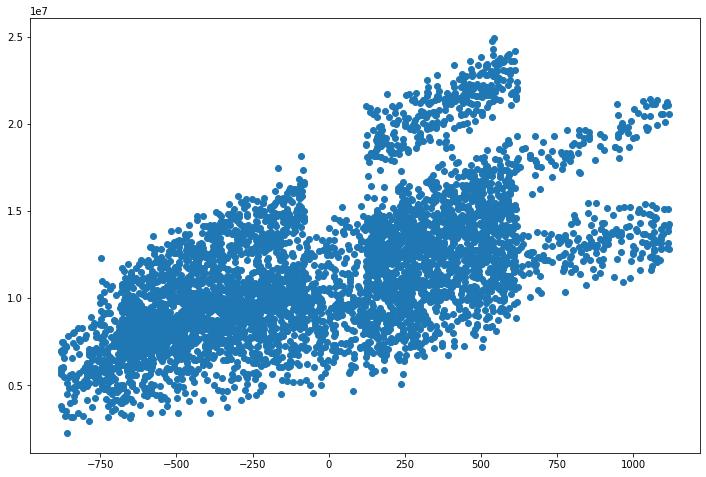

In [ ]:
plt.scatter(X_train_pca, y_train)
plt.show()

To predict range lets choose X with correlated features

In [ ]:
X2 = X_test[['AREA', 'INT_SQFT', 'Others', 'House', 'N_ROOM', 'MZZONE', 'PARK_FACIL']]

In [ ]:
X_test_pca = pca.transform(X2)

In [ ]:
len(X_train_pca), len(y_train)

(4976, 4976)

In [ ]:
y_train

4755    14019224
1212     6419830
2089    13093137
6641    19316106
4986    10556087
          ...   
4931    13517003
3264    14308876
1653    12176545
2607    17726898
2732    13051353
Name: SALES_PRICE, Length: 4976, dtype: int64

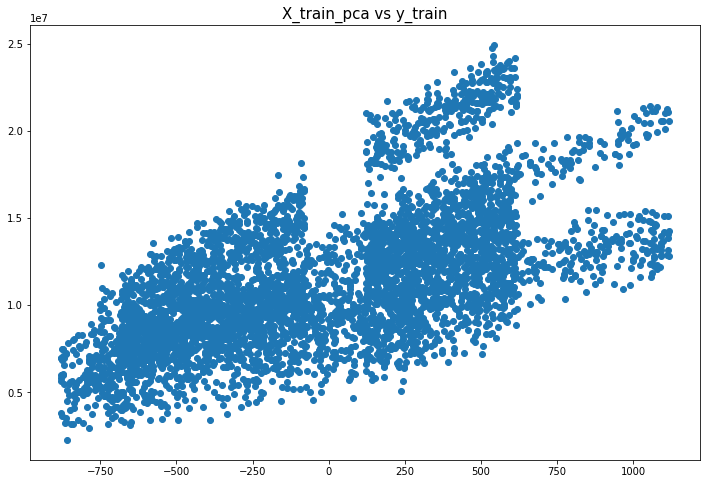

In [ ]:
plt.scatter(X_train_pca, y_train)
plt.title('X_train_pca vs y_train', size = 15)
plt.show()

In [ ]:
# std_dev
s = np.std(X_train_pca)

In probability and statistics, 1.96 is the approximate value of the 97.5 percentile point of the standard normal distribution. 95% of the area under a normal curve lies within roughly 1.96 standard deviations of the mean, and due to the central limit theorem, this number is therefore used in the construction of approximate 95% confidence intervals

In [ ]:
interval = 1.96 * s

In [ ]:
rf_regressor.fit(X_train_pca, y_train)

RandomForestRegressor(max_depth=80, min_samples_leaf=2, n_estimators=1000)

In [ ]:
to_pred = X_test_pca[1]

In [ ]:
pred_value = rf_regressor.predict([to_pred])

In [ ]:
pred_value

array([15066079.82984641])

In [ ]:
lower, upper = pred_value - interval, pred_value + interval

In [ ]:
print(f'Predicted output range between:{lower} and {upper}')

Predicted output range between:[15065180.75452736] and [15066978.90516545]


We can do the same interval prediction with Linear regression too and its easy to visualize

In [ ]:
lr_model = LinearRegression()

In [ ]:
lr_model.fit(X_train_pca, y_train)

LinearRegression()

In [ ]:
b0, b1 = lr_model.coef_, lr_model.intercept_

In [ ]:
reg = X_train_pca * b0 + b1

In [ ]:
lr_predicted = lr_model.predict([to_pred])

In [ ]:
lower, upper = lr_predicted - interval, lr_predicted + interval

In [ ]:
s = np.std(y_train)

In [ ]:
interval = 1.96 * s

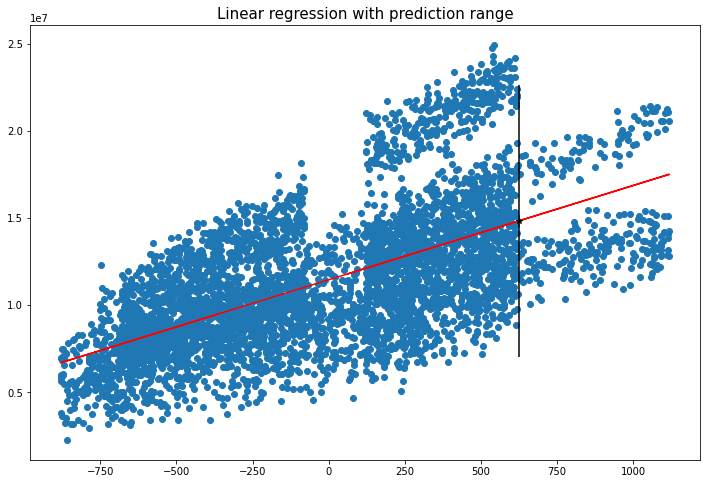

Predicted output range between:[14847002.98528235] and [14848801.13592044]


In [ ]:
plt.scatter(X_train_pca, y_train)
plt.plot(X_train_pca, reg, color='red')
plt.errorbar(to_pred, lr_predicted, yerr=interval, color='black', fmt='*')
plt.title('Linear regression with prediction range', size = 15)
plt.show()
print(f'Predicted output range between:{lower} and {upper}')

---

---